# Data Science Memo: Evaluating the Impact of Florida's 2010 Opioid Policy

## Stakeholder

This memo is written for senior government officials and policy advisors in the Department of Health of any state. They may have high expertise in public policy or public health, but with limited technical training in data science.

## Executive Summary

Florida faced a severe issue in the abuse of prescription opioids and overdose deaths before 2010. In response to this, the state government introduced a set of opioid regulations in 2010. This memo evaluates whether this policy change reduced opioid prescriptions and overdose mortality. Using county-year data from 2007-2012 and a difference-in-differences method, this memo estimate the policy’s causal effect by comparing Florida with three control states — California, New Jersey, and Oregon — which did not implement similar policies during this period.

The findings show clear and consistent evidence that the 2010 policy was effective. Opioid prescriptions in Florida fell by about 0.135--0.140 MME per capita relative to the control states, and overdose mortality decreased by roughly two deaths per 100,000 people. These reductions are positively related to the policy and are robust under demographic and socioeconomic control variables. 

In short, Florida’s 2010 opioid policy change produced measurable public health benefits and should be considered a successful intervention.

## Decisions To Be Made

Based on the results, this memo recommends stakeholders to focus on the following two main decisions:
- Continue the 2010 opioid regulations.
The evidence shows clear reductions in both opioid prescriptions and overdose mortality after the policy. These improvements strongly support continuing this policy.
- Expand this policy to other states.
Because the policy led to measurable public health benefits in Florida, it may also help other states facing similar opioid challenges. 

## Main Problem

Before 2010, Florida experienced one of the highest rates of opioid prescription in the United States, which is known as "pill mill". This phenomenon led to rising overdose deaths and consequently a severe public health crisis. In 2010, Florida introduced a new policy to curb the abuse of prescribed opioids and overdoes death. 

To understand whether this policy change should be continued or even expanded to other states, this memo evaluated the effectiveness of Florida's 2010 opioid policy by answering: Did Florida's 2010 opioid policy reduce 
- (1) opioid drug prescriptions (measured by MME per capita), and 
- (2) overdose mortality (per 100,000 people).

## Analytical Plan

This memo evaluates whether Florida's 2010 opioid policy reduced opioid prescription and overdoes mortaligy. To evaluate this policy, we use county-year data from 2007-2012, which allows us to compare Florida (treatment group) with three similar states - California, New Jersey, and Oregon - that did not adopt a comparable policy during this period. This comparison enables us to isolate the effect of Florida's policy from broader national trends.

**Key Variables**
- treatment indicator: $treat_i​=1$ for Florida counties and $0$ otherwise.

- Event-time variable: $event\_time_{t} = year_t - 2010$, which enables us to track pre-post trends.

- Outcome variables: 
  - *opioid shipments* (MME per capita)
  - *overdose mortality* (deaths per 100,000 people),  
    both of which directly capture the harms the policy aimed to reduce.

**Model and Analysis**

To see whether Florida's 2010 opioid policy is actually effective apart from other factors, this memo uses the following strategies:
- Pre-post analysis:
We first compare Florida and the control states before and after 2010, to see whether two outcome measures declinded in Florida after the policy was implemented, but not in the control states.

- Difference-in-Difference (DiD):
We then use a DiD model to quantify whether the changes observed in Florida after the policy were significantly larger than those in the control states, which implies a causal effect of the policy's intervention.


## Main Findings

Florida and the control states show broadly similar pre-policy trends for both opioid shipments and overdose mortality, supporting the validity of the comparison. Following the 2010 policy, graphical evidence shows a clear divergence: Florida’s shipments and mortality decline, while the control states remain relatively stable.

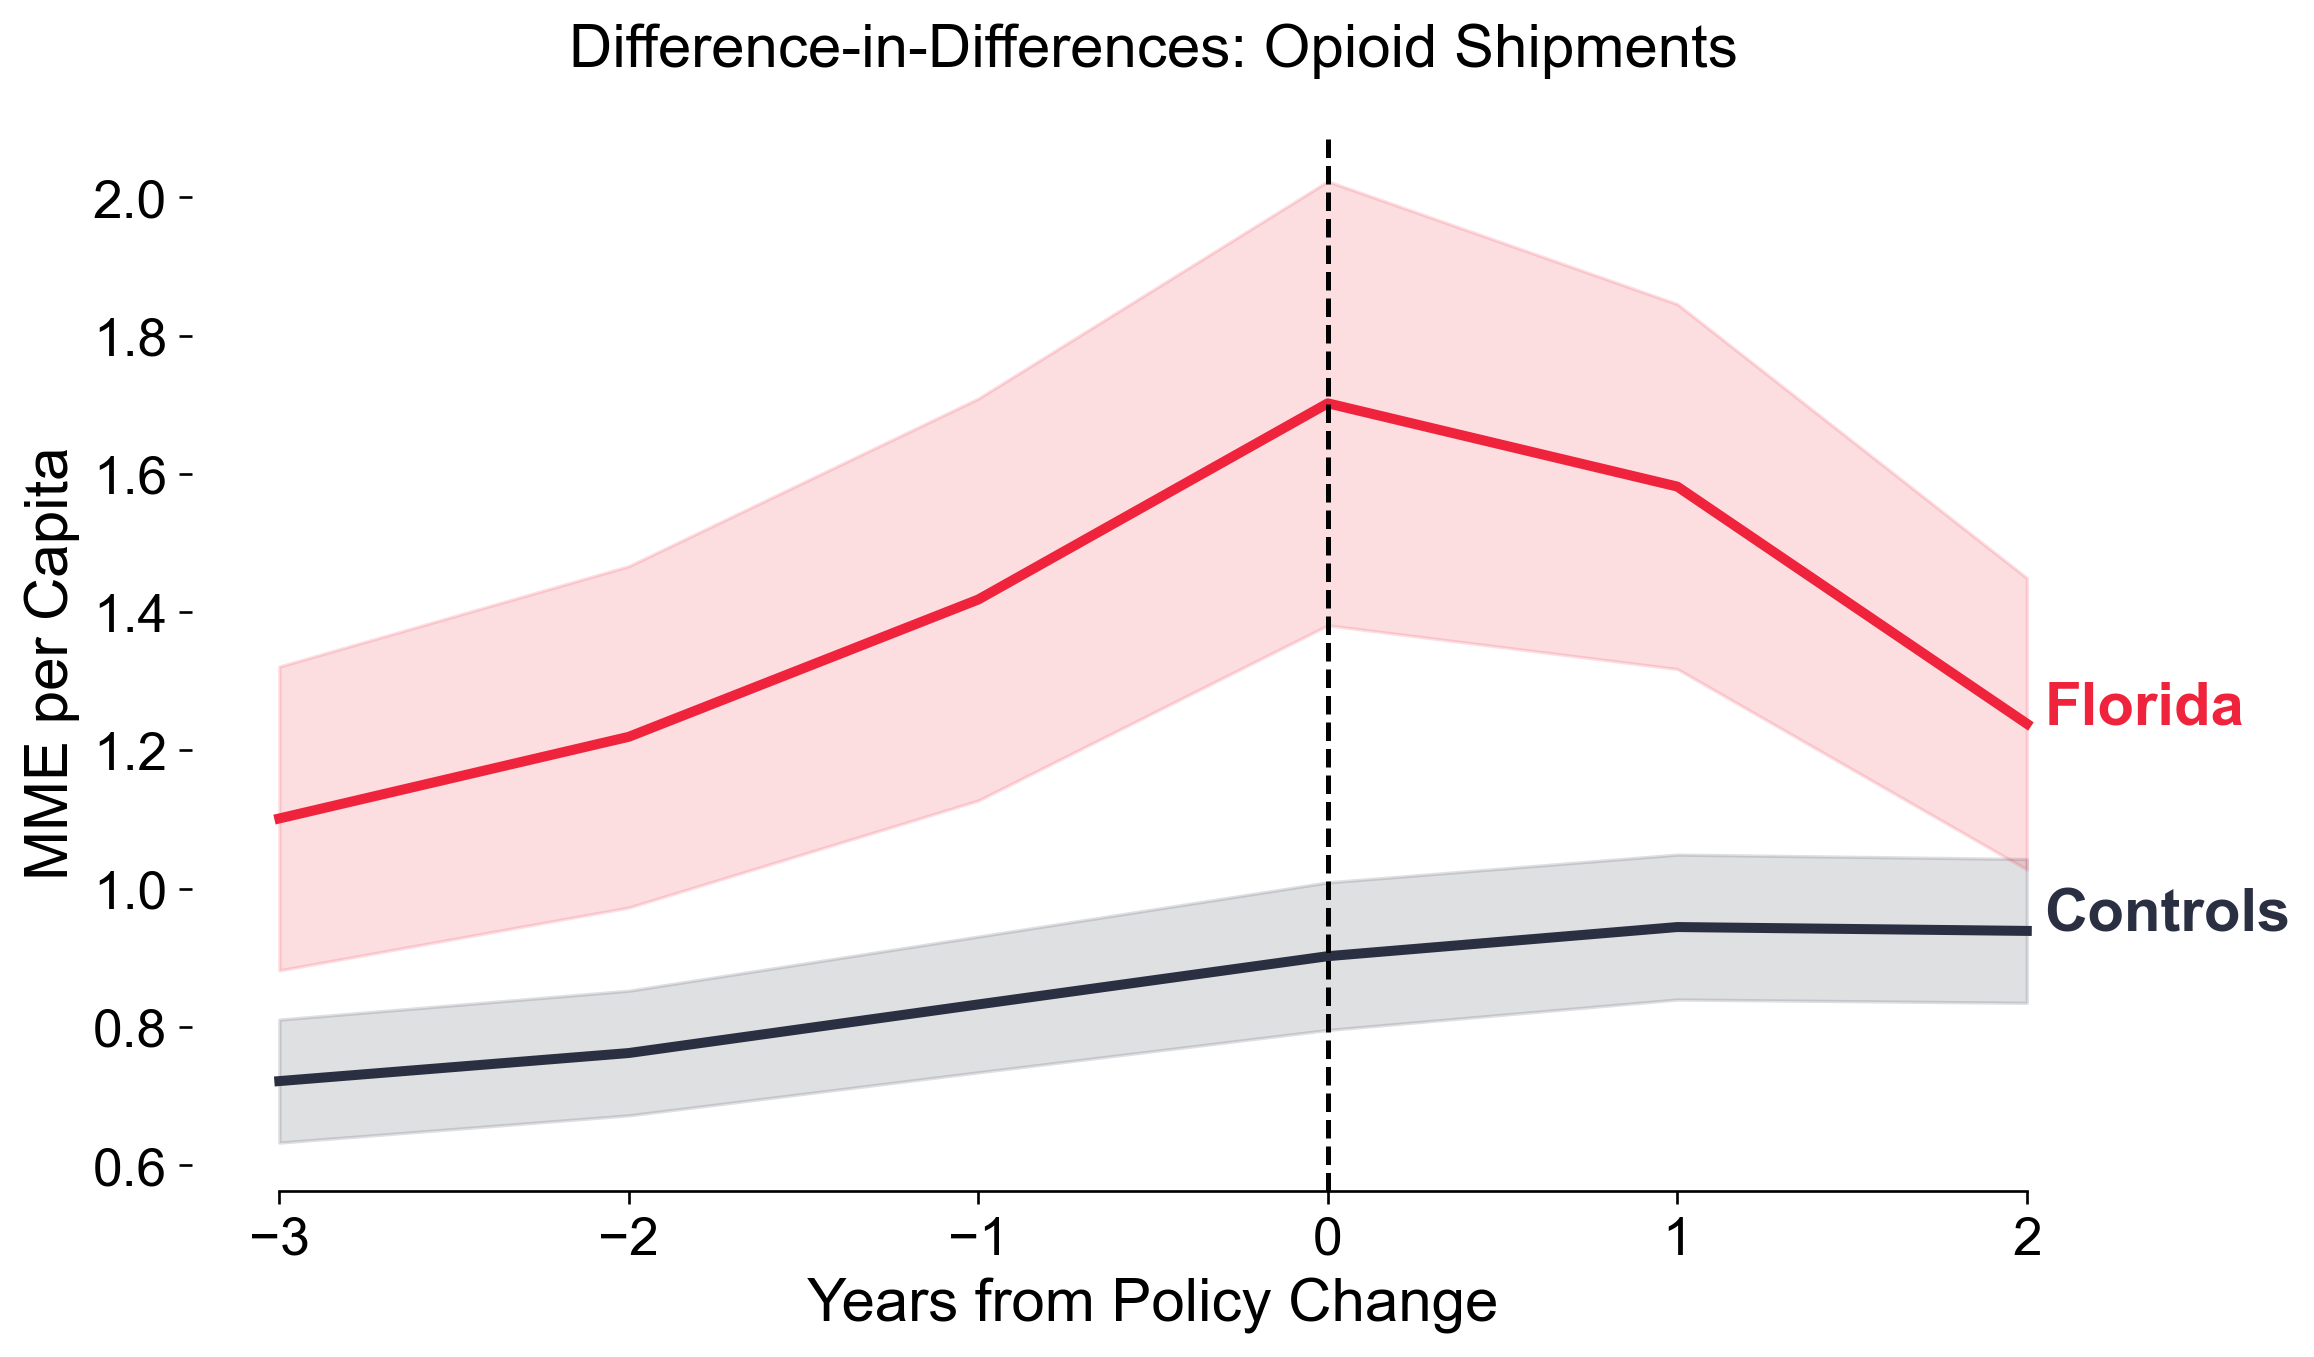
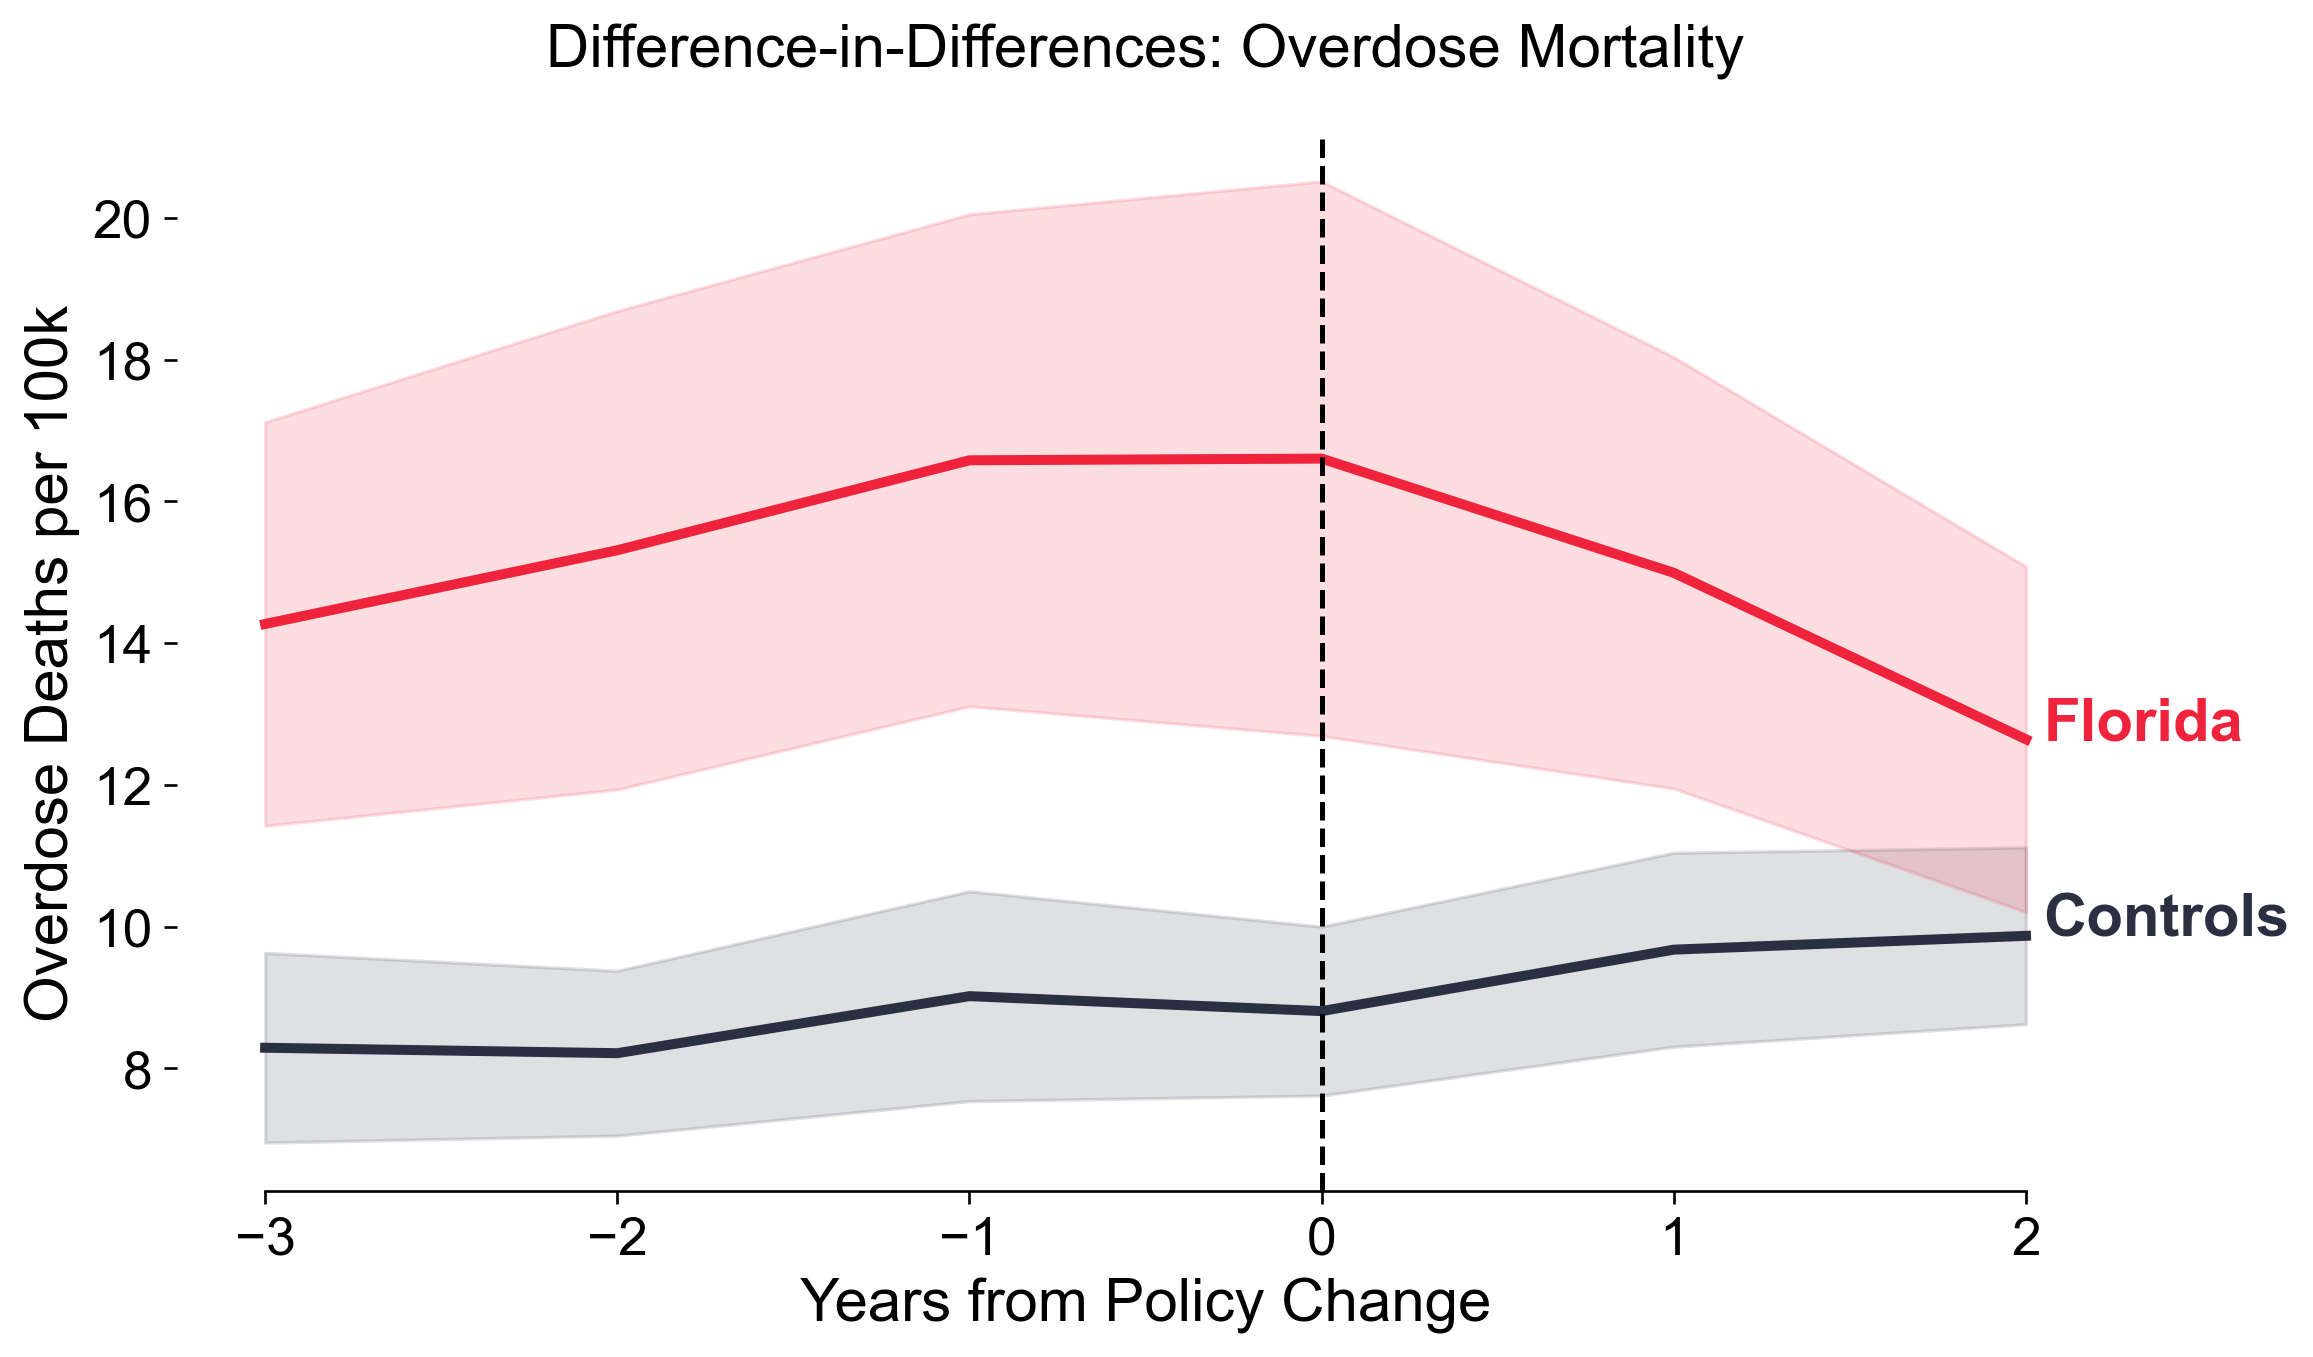

Regression-based DiD estimates confirm these patterns. Opioid prescriptions fall by about 0.14 MME per capita, and overdose mortality declines by roughly 2 deaths per 100,000 people, with both effects statistically significant and robust to demographic and socioeconomic control variables, including polulation, sex, age structure, racial composition, educational attainment, and poverty rate.

### Limitations

These findings should be interpreted with some caution in mind. First, the comparison relies on three control states, so the results should not be interpreted as effects that necessarily extend to all U.S. states.

Second, the pre-policy period only includes three years (2007-2009), so the strength of parallel trends assessment is limited. Florida even shows a slightly more upward trend in opioid prescriptions before 2010. Although the trends are still reasonably close for a DiD comparion, a longer pre-policy window might add robustness in the test.

Third, both outcome variables are county-level aggregates, so the analysis captures reduced-form effects of the policy instead of inner mechanisms that produced these changes.

Although these limitations do not overturn the main findings, but with them, stakeholders may consider the scope within which the conclusions should be applied.

## Conclusion

Florida's 2010 opioid policy produced clear and measurable improvements in public health. Both opioid prescriptions and overdose mortality declined relative to control states, which is supported by regressional evidence.

These findings suggest that the policy was effective and may serve as a useful policy model for future opioid-control efforts. Continuing and expanding such policy is recommended.

## Appendix

### Data Cleaning

In [215]:
# load necessary packages
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

#### Vital Statistics Mortality Data

In [216]:
# load the datasets: 2003 - 2016
list_mortality_datasets = [x for x in range(2003, 2016)]
death_df = pd.DataFrame()
for year in list_mortality_datasets:
    death_data = pd.read_csv(
        f"https://media.githubusercontent.com/media/nickeubank/ids540_opioid_data/refs/heads/main/vitalstatistics/Underlying%20Cause%20of%20Death%2C%20{year}.txt",
        delimiter="\t",
    )
    death_data["year"] = year
    death_df = pd.concat([death_df, death_data], ignore_index=True)

In [217]:
# year: 2007-2012,
# states: Treatment - Florida, Control - California, New Jersey, Oregon
# remove Year and Year code (redundant)
death_df = death_df.drop(columns=["Year", "Year Code"])
# Deaths
death_df["Deaths"] = pd.to_numeric(death_df["Deaths"], errors="coerce").astype(float)

In [218]:
# adjust FIPS code
death_df["County Code"] = (
    death_df["County Code"]
    .astype(str)
    .str.strip()  # remove space
    .str.replace(r"\.0$", "", regex=True)  # remove .0
    .str.zfill(5)  # 5 digits
)

# Check the transoformation of County Code
death_df[death_df["County Code"].str.len() != 5]["County Code"].unique()

# check empty values and potentail duplicated values
death_df["County Code"].isna().sum()

0

In [219]:
# year: 2007 - 2012
death_df_1 = death_df[(death_df["year"] >= 2007) & (death_df["year"] <= 2012)]

# 4 states: Florida (12), California(06), New Jersey(34), Oregon(41)
target_states = ["12", "06", "34", "41"]

death_df_1 = death_df_1[death_df_1["County Code"].str.startswith(tuple(target_states))]

death_df_1.head(10)

,Notes,County,County Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,year
16983,NaN,"Alameda County, CA",06001,Drug poisonings (overdose) Unintentional (X40-...,D1,163.0,2007
16984,NaN,"Alameda County, CA",06001,Drug poisonings (overdose) Suicide (X60-X64),D2,22.0,2007
16985,NaN,"Alameda County, CA",06001,"Alcohol poisonings (overdose) (X45, X65, Y15)",A1,13.0,2007
16986,NaN,"Alameda County, CA",06001,All other alcohol-induced causes,A9,129.0,2007
16987,NaN,"Alameda County, CA",06001,All other non-drug and non-alcohol causes,O9,8989.0,2007
16988,NaN,"Amador County, CA",06005,All other non-drug and non-alcohol causes,O9,376.0,2007
16989,NaN,"Butte County, CA",06007,Drug poisonings (overdose) Unintentional (X40-...,D1,58.0,2007
16990,NaN,"Butte County, CA",06007,All other alcohol-induced causes,A9,22.0,2007
16991,NaN,"Butte County, CA",06007,All other non-drug and non-alcohol causes,O9,2175.0,2007
16992,NaN,"Calaveras County, CA",06009,All other non-drug and non-alcohol causes,O9,397.0,2007


#### Opioid Prescriptions Data

In [220]:
# import the opioid data
opioids_cy = pd.read_parquet(
    "https://github.com/nickeubank/ids540_opioid_data/raw/refs/heads/main/ids590_opioids_by_drug_county_year.parquet"
)

# import fips code
op_fips = pd.read_csv(
    "https://raw.githubusercontent.com/wpinvestigative/arcos-api/refs/heads/master/data/county_fips.csv"
)

In [221]:
# Combine opioids with FIPS code
# change the name in op_fips data
op_fips = op_fips.rename(
    columns={"BUYER_STATE": "buyer_state", "BUYER_COUNTY": "buyer_county"}
)

# adjust the fips code
op_fips["countyfips"] = op_fips["countyfips"].astype(str).str.zfill(5)
op_fips.head(10)

,buyer_county,buyer_state,countyfips
0,AUTAUGA,AL,01001
1,BALDWIN,AL,01003
2,BARBOUR,AL,01005
3,BIBB,AL,01007
4,BLOUNT,AL,01009
5,BULLOCK,AL,01011
6,BUTLER,AL,01013
7,CALHOUN,AL,01015
8,CHAMBERS,AL,01017
9,CHEROKEE,AL,01019


In [222]:
# Combine two datasets
opioids_df = pd.merge(
    opioids_cy, op_fips, how="outer", on=["buyer_state", "buyer_county"]
)

# have checked the matching: indicator=True
# opioids_df[opioids_df._merge != "both"], all rows match successfully

In [223]:
# year: 2007 - 2012
opioids_df_1 = opioids_df[(opioids_df["year"] >= 2007) & (opioids_df["year"] <= 2012)]
# integer
opioids_df_1["year"] = opioids_df_1["year"].astype(int)


# 4 states: FL, CA, NJ, OR
opioids_df_1 = opioids_df_1[opioids_df_1["buyer_state"].isin(["FL", "CA", "NJ", "OR"])]

# check the 4 states
opioids_df_1.groupby("buyer_state")["buyer_county"].nunique()

buyer_state
CA    57
FL    67
NJ    21
OR    34
Name: buyer_county, dtype: int64

> In total, 4 states should have 182 states, and mortality data does have 182 states, whereas opioids_df_1 only has 167 states. CA - 58, FL - 67, NJ - 21, OR - 26

In [224]:
opioids_df_1.head(10)

,buyer_state,buyer_county,year,drug_name,mme_conversion_factor,calc_base_wt_in_gm,countyfips
32697,CA,ALAMEDA,2007,BUPRENORPHINE,30.0,951.545738,06001
32698,CA,ALAMEDA,2007,BUPRENORPHINE,75.0,0.042071,06001
32699,CA,ALAMEDA,2007,CODEINE,0.15,209552.490726,06001
32700,CA,ALAMEDA,2007,DIHYDROCODEINE,0.25,15.176001,06001
32701,CA,ALAMEDA,2007,FENTANYL,100.0,1852.491745,06001
32702,CA,ALAMEDA,2007,FENTANYL,130.0,95.805201,06001
32703,CA,ALAMEDA,2007,HYDROCODONE,1.0,343541.935046,06001
32704,CA,ALAMEDA,2007,HYDROMORPHONE,4.0,5551.601937,06001
32705,CA,ALAMEDA,2007,LEVORPHANOL,11.0,86.4756,06001
32706,CA,ALAMEDA,2007,MEPERIDINE,0.1,5524.634702,06001


> After a series of checking , for opioids_df_1, most counties missing here are counties with small populations. 

In [225]:
# Combine opioid and mortality data
death_df_1.head(10)

,Notes,County,County Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,year
16983,NaN,"Alameda County, CA",06001,Drug poisonings (overdose) Unintentional (X40-...,D1,163.0,2007
16984,NaN,"Alameda County, CA",06001,Drug poisonings (overdose) Suicide (X60-X64),D2,22.0,2007
16985,NaN,"Alameda County, CA",06001,"Alcohol poisonings (overdose) (X45, X65, Y15)",A1,13.0,2007
16986,NaN,"Alameda County, CA",06001,All other alcohol-induced causes,A9,129.0,2007
16987,NaN,"Alameda County, CA",06001,All other non-drug and non-alcohol causes,O9,8989.0,2007
16988,NaN,"Amador County, CA",06005,All other non-drug and non-alcohol causes,O9,376.0,2007
16989,NaN,"Butte County, CA",06007,Drug poisonings (overdose) Unintentional (X40-...,D1,58.0,2007
16990,NaN,"Butte County, CA",06007,All other alcohol-induced causes,A9,22.0,2007
16991,NaN,"Butte County, CA",06007,All other non-drug and non-alcohol causes,O9,2175.0,2007
16992,NaN,"Calaveras County, CA",06009,All other non-drug and non-alcohol causes,O9,397.0,2007


In [226]:
death_df_1["Drug/Alcohol Induced Cause"].value_counts()

Drug/Alcohol Induced Cause
All other non-drug and non-alcohol causes             1085
All other alcohol-induced causes                       631
Drug poisonings (overdose) Unintentional (X40-X44)     581
Drug poisonings (overdose) Suicide (X60-X64)           216
Alcohol poisonings (overdose) (X45, X65, Y15)           68
All other drug-induced causes                           60
Drug poisonings (overdose) Undetermined (Y10-Y14)       42
Name: count, dtype: int64

In [227]:
drug_induced_death = ["Drug poisonings (overdose) Unintentional (X40-X44)"]
death_df_overdose = death_df_1[
    death_df_1["Drug/Alcohol Induced Cause"].isin(drug_induced_death)
]

In [228]:
death_overdose = (
    death_df_overdose.groupby(["County Code", "year"], as_index=False)["Deaths"]
    .sum()
    .rename(columns={"Deaths": "overdose_deaths"})
)
death_overdose.head(10)

,County Code,year,overdose_deaths
0,06001,2007,163.0
1,06001,2008,135.0
2,06001,2009,119.0
3,06001,2010,106.0
4,06001,2011,139.0
5,06001,2012,115.0
6,06005,2009,13.0
7,06007,2007,58.0
8,06007,2008,58.0
9,06007,2009,49.0


In [229]:
opioids_df_1.head(10)

,buyer_state,buyer_county,year,drug_name,mme_conversion_factor,calc_base_wt_in_gm,countyfips
32697,CA,ALAMEDA,2007,BUPRENORPHINE,30.0,951.545738,06001
32698,CA,ALAMEDA,2007,BUPRENORPHINE,75.0,0.042071,06001
32699,CA,ALAMEDA,2007,CODEINE,0.15,209552.490726,06001
32700,CA,ALAMEDA,2007,DIHYDROCODEINE,0.25,15.176001,06001
32701,CA,ALAMEDA,2007,FENTANYL,100.0,1852.491745,06001
32702,CA,ALAMEDA,2007,FENTANYL,130.0,95.805201,06001
32703,CA,ALAMEDA,2007,HYDROCODONE,1.0,343541.935046,06001
32704,CA,ALAMEDA,2007,HYDROMORPHONE,4.0,5551.601937,06001
32705,CA,ALAMEDA,2007,LEVORPHANOL,11.0,86.4756,06001
32706,CA,ALAMEDA,2007,MEPERIDINE,0.1,5524.634702,06001


In [230]:
opioids_df_1["mme"] = (
    opioids_df_1["calc_base_wt_in_gm"] * opioids_df_1["mme_conversion_factor"]
)
opioids_df_1.head(10)

,buyer_state,buyer_county,year,drug_name,mme_conversion_factor,calc_base_wt_in_gm,countyfips,mme
32697,CA,ALAMEDA,2007,BUPRENORPHINE,30.0,951.545738,06001,28546.37214
32698,CA,ALAMEDA,2007,BUPRENORPHINE,75.0,0.042071,06001,3.155355
32699,CA,ALAMEDA,2007,CODEINE,0.15,209552.490726,06001,31432.873609
32700,CA,ALAMEDA,2007,DIHYDROCODEINE,0.25,15.176001,06001,3.794
32701,CA,ALAMEDA,2007,FENTANYL,100.0,1852.491745,06001,185249.17455
32702,CA,ALAMEDA,2007,FENTANYL,130.0,95.805201,06001,12454.676078
32703,CA,ALAMEDA,2007,HYDROCODONE,1.0,343541.935046,06001,343541.935046
32704,CA,ALAMEDA,2007,HYDROMORPHONE,4.0,5551.601937,06001,22206.407747
32705,CA,ALAMEDA,2007,LEVORPHANOL,11.0,86.4756,06001,951.2316
32706,CA,ALAMEDA,2007,MEPERIDINE,0.1,5524.634702,06001,552.46347


In [231]:
opioids_agg = opioids_df_1.groupby(["countyfips", "year"], as_index=False).agg(
    total_grams=("calc_base_wt_in_gm", "sum"), total_mme=("mme", "sum")
)
opioids_agg.head(10)

,countyfips,year,total_grams,total_mme
0,06001,2007,825601.233034,1052558.500894
1,06001,2008,847083.303522,1117798.930286
2,06001,2009,875071.886798,1199622.098446
3,06001,2010,870211.603741,1247010.639905
4,06001,2011,896433.100448,1296731.400855
5,06001,2012,900341.807573,1313075.53561
6,06005,2007,28486.513615,50147.191799
7,06005,2008,31402.138263,56498.072585
8,06005,2009,34543.746528,63986.757334
9,06005,2010,34834.035017,66070.709978


#### NHGIS dataset for control variables

In [232]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

nhgis = pd.read_csv(
    "/Users/chenqiyu/Desktop/nhgis0001_csv/nhgis0001_ts_nominal_county.csv"
)
nhgis.head()

,GISJOIN,STATE,STATEFP,STATENH,COUNTY,COUNTYFP,COUNTYNH,AV0AA115,AV0AA115M,AV0AA135,...,BS7AB135,BS7AB135M,BS7AC115,BS7AC115M,BS7AC135,BS7AC135M,BS7AD115,BS7AD115M,BS7AD135,BS7AD135M
0,G0100010,Alabama,1,10,Autauga County,1,10,53944,0,54907,...,1099,313,1757,296,1805,316,16094,814,15903,864
1,G0100030,Alabama,1,10,Baldwin County,3,30,179523,0,187114,...,3571,446,8204,793,8996,796,55072,1824,55940,1831
2,G0100050,Alabama,1,10,Barbour County,5,50,27546,0,27321,...,1063,165,1329,204,1423,211,5693,433,5388,409
3,G0100070,Alabama,1,10,Bibb County,7,70,22746,0,22754,...,472,173,1157,244,1379,252,4985,548,4539,475
4,G0100090,Alabama,1,10,Blount County,9,90,57140,0,57623,...,1159,207,2897,379,2753,359,15149,806,15532,840


In [233]:
# define variable prefixes we need (according to the code book)
needed_prefixes = [
    "AV0",  # population
    "AV1",  # sex
    "B57",  # age (18 groups)
    "B18",  # race (5 categories)
    "BW7",  # educational attainment (5 groups)
    "BS7",  # household income
]

In [234]:
# map raw nhgis variable codes to clear variable names for 2009 and 2011
# collapse time period: 2007-2011 -> 2009; 2009-2013 -> 2011
rename_map = {
    # POPULATION
    "AV0AA115": "population_2009",
    "AV0AA135": "population_2011",
    # SEX
    "AV1AA115": "male_2009",
    "AV1AA135": "male_2011",
    "AV1AB115": "female_2009",
    "AV1AB135": "female_2011",
    # AGE (18 groups)
    "B57AA115": "under_5__years_2009",
    "B57AA135": "under_5__years_2011",
    "B57AB115": "5_to_9_years_2009",
    "B57AB135": "5_to_9_years_2011",
    "B57AC115": "10_to_14_years_2009",
    "B57AC135": "10_to_14_years_2011",
    "B57AD115": "15_to_17_years_2009",
    "B57AD135": "15_to_17_years_2011",
    "B57AE115": "18_to_19_years_2009",
    "B57AE135": "18_to_19_years_2011",
    "B57AF115": "20_years_2009",
    "B57AF135": "20_years_2011",
    "B57AG115": "21_years_2009",
    "B57AG135": "21_years_2011",
    "B57AH115": "22_to_24_years_2009",
    "B57AH135": "22_to_24_years_2011",
    "B57AI115": "25_to_29_years_2009",
    "B57AI135": "25_to_29_years_2011",
    "B57AJ115": "30_to_34_years_2009",
    "B57AJ135": "30_to_34_years_2011",
    "B57AK115": "35_to_44_years_2009",
    "B57AK135": "35_to_44_years_2011",
    "B57AL115": "45_to_54_years_2009",
    "B57AL135": "45_to_54_years_2011",
    "B57AM115": "55_to_59_years_2009",
    "B57AM135": "55_to_59_years_2011",
    "B57AN115": "60_to_61_years_2009",
    "B57AN135": "60_to_61_years_2011",
    "B57AO115": "62_to_64_years_2009",
    "B57AO135": "62_to_64_years_2011",
    "B57AP115": "65_to_74_years_2009",
    "B57AP135": "65_to_74_years_2011",
    "B57AQ115": "75_to_84_years_2009",
    "B57AQ135": "75_to_84_years_2011",
    "B57AR115": "85_years_and_over_2009",
    "B57AR135": "85_years_and_over_2011",
    # RACE (5 groups)
    "B18AA115": "White_2009",
    "B18AA135": "White_2011",
    "B18AB115": "Black_or_African_American_2009",
    "B18AB135": "Black_or_African_American_2011",
    "B18AC115": "American_Indian_and_Alaska_Native_2009",
    "B18AC135": "American_Indian_and_Alaska_Native_2011",
    "B18AD115": "Asian_and_Pacific_Islander_and_Other_Race_2009",
    "B18AD135": "Asian_and_Pacific_Islander_and_Other_Race_2011",
    "B18AE115": "Two_or_More_Races_2009",
    "B18AE135": "Two_or_More_Races_2011",
    # EDUCATIONAL ATTAINMENT (5 groups)
    "BW7AA115": "Less_than_9th_grade_2009",
    "BW7AA135": "Less_than_9th_grade_2011",
    "BW7AB115": "9th_to_11th_grade_2009",
    "BW7AB135": "9th_to_11th_grade_2011",
    "BW7AC115": "12th_grade_or_high_school_graduate_2009",
    "BW7AC135": "12th_grade_or_high_school_graduate_2011",
    "BW7AD115": "1_to_3_years_of_college_2009",
    "BW7AD135": "1_to_3_years_of_college_2011",
    "BW7AE115": "4_or_more_years_of_college_2009",
    "BW7AE135": "4_or_more_years_of_college_2011",
    # HOUSEHOLD INCOME (4 groups)
    "BS7AA115": "less_than_10,000_2009",
    "BS7AA135": "less_than_10,000_2011",
    "BS7AB115": "10,000_to_14,999_2009",
    "BS7AB135": "10,000_to_14,999_2011",
    "BS7AC115": "15,000_to_24,999_2009",
    "BS7AC135": "15,000_to_24,999_2011",
    "BS7AD115": "25,000_or_more_2009",
    "BS7AD135": "25,000_or_more_2011",
}

In [235]:
# select only geographic identifiers + the variables we need
geo_cols = ["GISJOIN", "STATE", "COUNTY", "COUNTYFP"]

data_cols = []
# loop through all columns in the raw nhgis dataset
for col in nhgis.columns:
    # to check whether the column belongs to any table we care about
    # (population, sex, age, race, education, income), identified by prefixes
    for prefix in needed_prefixes:
        if col.startswith(prefix):
            # if the column matches one of the prefixes, append it
            data_cols.append(col)
            break

In [236]:
# subset the dataset to keep only:
# (1) geographic identifiers (GISJOIN, STATE, COUNTY, COUNTYFP)
# (2) selected demographic/ACS variables we need above
nhgis_cleaned = nhgis[geo_cols + data_cols]

# rename raw nhgis variable codes to human-readable names using rename_map
nhgis_cleaned = nhgis_cleaned.rename(columns=rename_map)

# select all columns that are from 2009 ACS
cols_2009 = [col for col in nhgis_cleaned.columns if col.endswith("_2009")]
# select all columns that are from 2011 ACS
cols_2011 = [col for col in nhgis_cleaned.columns if col.endswith("_2011")]

In [237]:
nhgis_cleaned[cols_2009]

,population_2009,male_2009,female_2009,under_5__years_2009,5_to_9_years_2009,10_to_14_years_2009,15_to_17_years_2009,18_to_19_years_2009,20_years_2009,21_years_2009,...,Two_or_More_Races_2009,Less_than_9th_grade_2009,9th_to_11th_grade_2009,12th_grade_or_high_school_graduate_2009,1_to_3_years_of_college_2009,4_or_more_years_of_college_2009,"less_than_10,000_2009","10,000_to_14,999_2009","15,000_to_24,999_2009","25,000_or_more_2009"
0,53944,26174,27770,3568,4095,4209,2836,1648,615,428,...,835,1551,2555,14997,8000,7478,1304,843,1757,16094
1,179523,87553,91970,11109,11370,11989,7126,4217,1894,1469,...,2453,5176,8222,46418,30765,33869,3987,3494,8204,55072
2,27546,14649,12897,1669,1837,1540,1087,656,245,362,...,591,1961,2672,7761,3900,2630,1523,1044,1329,5693
3,22746,11848,10898,1307,1689,1439,928,499,204,222,...,56,1531,1806,7401,3053,1500,460,623,1157,4985
4,57140,28357,28783,3601,3721,4251,2487,1425,688,689,...,736,3884,5606,16920,7716,4347,1560,1348,2897,15149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,59995,28898,31097,3800,4158,4695,2814,1803,962,979,...,738,9079,3784,12192,6869,6744,6011,2377,3300,6146
3217,9318,4625,4693,644,519,695,398,240,191,87,...,755,1368,948,2155,853,844,981,426,805,987
3218,26290,12973,13317,1786,1972,2157,1483,1008,584,355,...,781,4067,1400,5758,2318,2239,2627,1070,1369,2598
3219,38138,18609,19529,2452,2577,2876,1796,1179,723,524,...,8680,6089,2806,7969,4292,3386,3644,1609,2428,4094


In [238]:
nhgis_cleaned[cols_2011]

,population_2011,male_2011,female_2011,under_5__years_2011,5_to_9_years_2011,10_to_14_years_2011,15_to_17_years_2011,18_to_19_years_2011,20_years_2011,21_years_2011,...,Two_or_More_Races_2011,Less_than_9th_grade_2011,9th_to_11th_grade_2011,12th_grade_or_high_school_graduate_2011,1_to_3_years_of_college_2011,4_or_more_years_of_college_2011,"less_than_10,000_2011","10,000_to_14,999_2011","15,000_to_24,999_2011","25,000_or_more_2011"
0,54907,26793,28114,3489,3905,4398,2600,1583,730,561,...,755,1785,2722,15533,8184,7472,1264,1099,1805,15903
1,187114,91413,95701,11284,12386,11546,7436,4365,1874,2084,...,2697,4891,7560,48083,33442,36087,4776,3571,8996,55940
2,27321,14634,12687,1591,1730,1577,991,607,365,246,...,489,1827,2708,7752,4156,2545,1326,1063,1423,5388
3,22754,12343,10411,1290,1472,1359,938,703,211,446,...,218,1339,1895,7045,3210,1851,701,472,1379,4539
4,57623,28604,29019,3631,3693,4175,2499,1473,616,656,...,979,3010,5054,17150,8935,4697,1664,1159,2753,15532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,58782,28315,30467,3472,3913,4318,2680,1744,871,1047,...,689,8063,3816,13241,6475,7025,5779,2229,3367,6009
3217,9273,4695,4578,634,509,626,386,295,186,37,...,666,1418,829,2454,878,664,695,396,741,953
3218,25618,12581,13037,1623,1733,2040,1402,953,543,442,...,4270,3744,1381,5884,2246,2566,2482,1099,1477,2765
3219,37404,18223,19181,2237,2303,2797,1709,1128,678,568,...,5407,5940,2486,8124,4775,3266,3744,1645,2201,4318


In [239]:
# create the 2009 dataset by combining:
# (1) geographic identifier columns, and
# (2) all demographic variables that are from 2009 ACS
# 'axis=1' ensures we concatenate column-wise
nhgis_2009 = pd.concat(
    [nhgis_cleaned[geo_cols], nhgis_cleaned[cols_2009]], axis=1
).copy()

# add a YEAR column so that later we can use it in groupby
nhgis_2009["YEAR"] = 2009

In [240]:
# build a rename dictionary to remove the "_2009" suffix from all related variable
rename_2009 = {}
for col in cols_2009:
    new_name = col.replace("_2009", "")
    rename_2009[col] = new_name
nhgis_2009 = nhgis_2009.rename(columns=rename_2009)
nhgis_2009.columns  # view column names

Index(['GISJOIN', 'STATE', 'COUNTY', 'COUNTYFP', 'population', 'male',
       'female', 'under_5__years', '5_to_9_years', '10_to_14_years',
       '15_to_17_years', '18_to_19_years', '20_years', '21_years',
       '22_to_24_years', '25_to_29_years', '30_to_34_years', '35_to_44_years',
       '45_to_54_years', '55_to_59_years', '60_to_61_years', '62_to_64_years',
       '65_to_74_years', '75_to_84_years', '85_years_and_over', 'White',
       'Black_or_African_American', 'American_Indian_and_Alaska_Native',
       'Asian_and_Pacific_Islander_and_Other_Race', 'Two_or_More_Races',
       'Less_than_9th_grade', '9th_to_11th_grade',
       '12th_grade_or_high_school_graduate', '1_to_3_years_of_college',
       '4_or_more_years_of_college', 'less_than_10,000', '10,000_to_14,999',
       '15,000_to_24,999', '25,000_or_more', 'YEAR'],
      dtype='object')

In [241]:
# create the 2011 dataset by combining:
# (1) geographic identifier columns, and
# (2) all demographic variables that are from 2011 ACS
# 'axis=1' ensures we concatenate column-wise
nhgis_2011 = pd.concat(
    [nhgis_cleaned[geo_cols], nhgis_cleaned[cols_2011]], axis=1
).copy()

# add a YEAR column so that later we can use it in groupby
nhgis_2011["YEAR"] = 2011

In [242]:
# build a rename dictionary to remove the "_2011" suffix from all related variable
rename_2011 = {}
for col in cols_2011:
    new_name = col.replace("_2011", "")
    rename_2011[col] = new_name
nhgis_2011 = nhgis_2011.rename(columns=rename_2011)
nhgis_2011.columns  # view column names

Index(['GISJOIN', 'STATE', 'COUNTY', 'COUNTYFP', 'population', 'male',
       'female', 'under_5__years', '5_to_9_years', '10_to_14_years',
       '15_to_17_years', '18_to_19_years', '20_years', '21_years',
       '22_to_24_years', '25_to_29_years', '30_to_34_years', '35_to_44_years',
       '45_to_54_years', '55_to_59_years', '60_to_61_years', '62_to_64_years',
       '65_to_74_years', '75_to_84_years', '85_years_and_over', 'White',
       'Black_or_African_American', 'American_Indian_and_Alaska_Native',
       'Asian_and_Pacific_Islander_and_Other_Race', 'Two_or_More_Races',
       'Less_than_9th_grade', '9th_to_11th_grade',
       '12th_grade_or_high_school_graduate', '1_to_3_years_of_college',
       '4_or_more_years_of_college', 'less_than_10,000', '10,000_to_14,999',
       '15,000_to_24,999', '25,000_or_more', 'YEAR'],
      dtype='object')

In [243]:
# concatenate the 2009 and 2011 datasets into a single panel
# 'ignore_index=True' resets the row index after concatenating the two datasets
nhgis_panel = pd.concat([nhgis_2009, nhgis_2011], ignore_index=True)
nhgis_panel

,GISJOIN,STATE,COUNTY,COUNTYFP,population,male,female,under_5__years,5_to_9_years,10_to_14_years,...,Less_than_9th_grade,9th_to_11th_grade,12th_grade_or_high_school_graduate,1_to_3_years_of_college,4_or_more_years_of_college,"less_than_10,000","10,000_to_14,999","15,000_to_24,999","25,000_or_more",YEAR
0,G0100010,Alabama,Autauga County,1,53944,26174,27770,3568,4095,4209,...,1551,2555,14997,8000,7478,1304,843,1757,16094,2009
1,G0100030,Alabama,Baldwin County,3,179523,87553,91970,11109,11370,11989,...,5176,8222,46418,30765,33869,3987,3494,8204,55072,2009
2,G0100050,Alabama,Barbour County,5,27546,14649,12897,1669,1837,1540,...,1961,2672,7761,3900,2630,1523,1044,1329,5693,2009
3,G0100070,Alabama,Bibb County,7,22746,11848,10898,1307,1689,1439,...,1531,1806,7401,3053,1500,460,623,1157,4985,2009
4,G0100090,Alabama,Blount County,9,57140,28357,28783,3601,3721,4251,...,3884,5606,16920,7716,4347,1560,1348,2897,15149,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,G7201450,Puerto Rico,Vega Baja Municipio,145,58782,28315,30467,3472,3913,4318,...,8063,3816,13241,6475,7025,5779,2229,3367,6009,2011
6438,G7201470,Puerto Rico,Vieques Municipio,147,9273,4695,4578,634,509,626,...,1418,829,2454,878,664,695,396,741,953,2011
6439,G7201490,Puerto Rico,Villalba Municipio,149,25618,12581,13037,1623,1733,2040,...,3744,1381,5884,2246,2566,2482,1099,1477,2765,2011
6440,G7201510,Puerto Rico,Yabucoa Municipio,151,37404,18223,19181,2237,2303,2797,...,5940,2486,8124,4775,3266,3744,1645,2201,4318,2011


In [244]:
# aggregate the data to ensure one row per county-year
nhgis_final = nhgis_panel.groupby(
    ["GISJOIN", "STATE", "COUNTY", "COUNTYFP", "YEAR"]
).sum()
nhgis_final

population   male  \
GISJOIN  STATE       COUNTY             COUNTYFP YEAR                      
G0100010 Alabama     Autauga County     1        2009       53944  26174   
                                                 2011       54907  26793   
G0100030 Alabama     Baldwin County     3        2009      179523  87553   
                                                 2011      187114  91413   
G0100050 Alabama     Barbour County     5        2009       27546  14649   
...                                                           ...    ...   
G7201490 Puerto Rico Villalba Municipio 149      2011       25618  12581   
G7201510 Puerto Rico Yabucoa Municipio  151      2009       38138  18609   
                                                 2011       37404  18223   
G7201530 Puerto Rico Yauco Municipio    153      2009       42516  20598   
                                                 2011       41194  19911   

                                                       female  under_5__years  \
GISJOIN  STATE       COUNTY             COUNTYFP YEAR                           
G0100010 Alabama     Autauga County     1        2009   27770            3568   
                                                 2011   28114            3489   
G0100030 Alabama     Baldwin County     3        2009   91970           11109   
                                                 2011   95701           11284   
G0100050 Alabama     Barbour County     5        2009   12897            1669   
...                                                       ...             ...   
G7201490 Puerto Rico Villalba Municipio 149      2011   13037            1623   
G7201510 Puerto Rico Yabucoa Municipio  151      2009   19529            2452   
                                                 2011   19181            2237   
G7201530 Puerto Rico Yauco Municipio    153      2009   21918            2554   
                                                 2011   21283            2349   

                                                       5_to_9_years  \
GISJOIN  STATE       COUNTY             COUNTYFP YEAR                 
G0100010 Alabama     Autauga County     1        2009          4095   
                                                 2011          3905   
G0100030 Alabama     Baldwin County     3        2009         11370   
                                                 2011         12386   
G0100050 Alabama     Barbour County     5        2009          1837   
...                                                             ...   
G7201490 Puerto Rico Villalba Municipio 149      2011          1733   
G7201510 Puerto Rico Yabucoa Municipio  151      2009          2577   
                                                 2011          2303   
G7201530 Puerto Rico Yauco Municipio    153      2009          2661   
                                                 2011          2388   

                                                       10_to_14_years  \
GISJOIN  STATE       COUNTY             COUNTYFP YEAR                   
G0100010 Alabama     Autauga County     1        2009            4209   
                                                 2011            4398   
G0100030 Alabama     Baldwin County     3        2009           11989   
                                                 2011           11546   
G0100050 Alabama     Barbour County     5        2009            1540   
...                                                               ...   
G7201490 Puerto Rico Villalba Municipio 149      2011            2040   
G7201510 Puerto Rico Yabucoa Municipio  151      2009            2876   
                                                 2011            2797   
G7201530 Puerto Rico Yauco Municipio    153      2009            3305   
                                                 2011            3068   

                                                       15_to_17_years  \
GISJOIN  STATE       COUNTY             COUNTYFP YEAR            

In [245]:
# read nhgis dataset
nh = nhgis_panel.copy()
nh.columns

Index(['GISJOIN', 'STATE', 'COUNTY', 'COUNTYFP', 'population', 'male',
       'female', 'under_5__years', '5_to_9_years', '10_to_14_years',
       '15_to_17_years', '18_to_19_years', '20_years', '21_years',
       '22_to_24_years', '25_to_29_years', '30_to_34_years', '35_to_44_years',
       '45_to_54_years', '55_to_59_years', '60_to_61_years', '62_to_64_years',
       '65_to_74_years', '75_to_84_years', '85_years_and_over', 'White',
       'Black_or_African_American', 'American_Indian_and_Alaska_Native',
       'Asian_and_Pacific_Islander_and_Other_Race', 'Two_or_More_Races',
       'Less_than_9th_grade', '9th_to_11th_grade',
       '12th_grade_or_high_school_graduate', '1_to_3_years_of_college',
       '4_or_more_years_of_college', 'less_than_10,000', '10,000_to_14,999',
       '15,000_to_24,999', '25,000_or_more', 'YEAR'],
      dtype='object')

In [246]:
# 4 states
tar_states = ["California", "Florida", "New Jersey", "Oregon"]
nh_1 = nh[nh["STATE"].isin(tar_states)]

In [247]:
# Adjust GISJOIN into County Code
nh_1["STATEFP"] = nh_1["STATE"].map(
    {"California": "06", "Florida": "12", "New Jersey": "34", "Oregon": "41"}
)

nh_1["County Code"] = nh_1["STATEFP"] + nh_1["COUNTYFP"].astype(str).str.zfill(3)

> ### 1 tip:
> this analysis just operationalize the policy change as having taken place in February 2010.

In [248]:
# mapping the year_group to year
def map_year_to_group(y):
    if 2007 <= y <= 2009:
        return 2009  # for year 2009 in nh dataset
    elif 2010 <= y <= 2012:
        return 2011  # for year 2011 in nh dataset
    else:
        return pd.NA

In [249]:
# add 'year group' to all three dataframes
death_overdose["year_group"] = death_overdose["year"].apply(map_year_to_group)
opioids_agg["year_group"] = opioids_agg["year"].apply(map_year_to_group)
nh_1["year_group"] = nh_1["YEAR"]
nh_pop = nh_1[["County Code", "year_group", "population"]]

In [250]:
death_overdose = death_overdose.merge(
    nh_pop, on=["County Code", "year_group"], how="left"
)
death_overdose.head(10)

,County Code,year,overdose_deaths,year_group,population
0,06001,2007,163.0,2009,1494876
1,06001,2008,135.0,2009,1494876
2,06001,2009,119.0,2009,1494876
3,06001,2010,106.0,2011,1535248
4,06001,2011,139.0,2011,1535248
5,06001,2012,115.0,2011,1535248
6,06005,2009,13.0,2009,38244
7,06007,2007,58.0,2009,219309
8,06007,2008,58.0,2009,219309
9,06007,2009,49.0,2009,219309


In [251]:
opioids_agg = opioids_agg.rename(columns={"countyfips": "County Code"})
opioids_agg = opioids_agg.merge(nh_pop, on=["County Code", "year_group"], how="left")
opioids_agg

,County Code,year,total_grams,total_mme,year_group,population
0,06001,2007,825601.233034,1052558.500894,2009,1494876
1,06001,2008,847083.303522,1117798.930286,2009,1494876
2,06001,2009,875071.886798,1199622.098446,2009,1494876
3,06001,2010,870211.603741,1247010.639905,2011,1535248
4,06001,2011,896433.100448,1296731.400855,2011,1535248
...,...,...,...,...,...,...
1067,41071,2008,50600.248317,91467.275015,2009,98293
1068,41071,2009,49776.260661,96569.744249,2009,98293
1069,41071,2010,51911.790552,99910.837807,2011,99802
1070,41071,2011,54043.384597,96382.871312,2011,99802


In [252]:
opioids_agg["mme_per_capita"] = opioids_agg["total_mme"] / opioids_agg["population"]

In [253]:
# introduce a scope condition as required
# remove population from sub-datasets
death_overdose = death_overdose.drop(columns=["population"])
opioids_agg = opioids_agg.drop(columns=["population"])
death_overdose.columns

Index(['County Code', 'year', 'overdose_deaths', 'year_group'], dtype='object')

In [254]:
# merge death + opioid
df_all = death_overdose.merge(
    opioids_agg, on=["County Code", "year", "year_group"], how="outer"
)
df_all.head(10)

,County Code,year,overdose_deaths,year_group,total_grams,total_mme,mme_per_capita
0,06001,2007,163.0,2009,825601.233034,1052558.500894,0.704111
1,06001,2008,135.0,2009,847083.303522,1117798.930286,0.747754
2,06001,2009,119.0,2009,875071.886798,1199622.098446,0.802489
3,06001,2010,106.0,2011,870211.603741,1247010.639905,0.812254
4,06001,2011,139.0,2011,896433.100448,1296731.400855,0.84464
5,06001,2012,115.0,2011,900341.807573,1313075.53561,0.855286
6,06005,2007,NaN,2009,28486.513615,50147.191799,1.311243
7,06005,2008,NaN,2009,31402.138263,56498.072585,1.477306
8,06005,2009,13.0,2009,34543.746528,63986.757334,1.673119
9,06005,2010,NaN,2011,34834.035017,66070.709978,1.765558


In [255]:
# add NHGIS data
df_all = df_all.merge(nh_1, on=["County Code", "year_group"], how="left")
df_all.head(10)

,County Code,year,overdose_deaths,year_group,total_grams,total_mme,mme_per_capita,GISJOIN,STATE,COUNTY,...,9th_to_11th_grade,12th_grade_or_high_school_graduate,1_to_3_years_of_college,4_or_more_years_of_college,"less_than_10,000","10,000_to_14,999","15,000_to_24,999","25,000_or_more",YEAR,STATEFP
0,06001,2007,163.0,2009,825601.233034,1052558.500894,0.704111,G0600010,California,Alameda County,...,45786,265831,210108,411652,27989,25930,43910,438331,2009,06
1,06001,2008,135.0,2009,847083.303522,1117798.930286,0.747754,G0600010,California,Alameda County,...,45786,265831,210108,411652,27989,25930,43910,438331,2009,06
2,06001,2009,119.0,2009,875071.886798,1199622.098446,0.802489,G0600010,California,Alameda County,...,45786,265831,210108,411652,27989,25930,43910,438331,2009,06
3,06001,2010,106.0,2011,870211.603741,1247010.639905,0.812254,G0600010,California,Alameda County,...,43297,268460,218608,436208,29125,26168,43635,446143,2011,06
4,06001,2011,139.0,2011,896433.100448,1296731.400855,0.84464,G0600010,California,Alameda County,...,43297,268460,218608,436208,29125,26168,43635,446143,2011,06
5,06001,2012,115.0,2011,900341.807573,1313075.53561,0.855286,G0600010,California,Alameda County,...,43297,268460,218608,436208,29125,26168,43635,446143,2011,06
6,06005,2007,NaN,2009,28486.513615,50147.191799,1.311243,G0600050,California,Amador County,...,1997,11891,8750,5439,658,622,1524,11479,2009,06
7,06005,2008,NaN,2009,31402.138263,56498.072585,1.477306,G0600050,California,Amador County,...,1997,11891,8750,5439,658,622,1524,11479,2009,06
8,06005,2009,13.0,2009,34543.746528,63986.757334,1.673119,G0600050,California,Amador County,...,1997,11891,8750,5439,658,622,1524,11479,2009,06
9,06005,2010,NaN,2011,34834.035017,66070.709978,1.765558,G0600050,California,Amador County,...,1923,11266,9086,5575,844,729,1531,11158,2011,06


In [256]:
# compute normalized rate
df_all["overdose_rate_per_100k"] = (
    df_all["overdose_deaths"] / df_all["population"] * 100000
)

df_all["mme_per_capita"] = df_all["total_mme"] / df_all["population"]
df_all["COUNTY"].value_counts()

COUNTY
Union County       18
Lake County        18
Jackson County     12
Orange County      12
Columbia County    12
                   ..
Bay County          6
Bradford County     6
Brevard County      6
Yamhill County      6
Glades County       4
Name: count, Length: 167, dtype: int64

In [257]:
# remove counties with population less than 350,000
df_all_big = df_all[df_all["population"] >= 350000]
df_all_big

,County Code,year,overdose_deaths,year_group,total_grams,total_mme,mme_per_capita,GISJOIN,STATE,COUNTY,...,12th_grade_or_high_school_graduate,1_to_3_years_of_college,4_or_more_years_of_college,"less_than_10,000","10,000_to_14,999","15,000_to_24,999","25,000_or_more",YEAR,STATEFP,overdose_rate_per_100k
0,06001,2007,163.0,2009,825601.233034,1052558.500894,0.704111,G0600010,California,Alameda County,...,265831,210108,411652,27989,25930,43910,438331,2009,06,10.903914
1,06001,2008,135.0,2009,847083.303522,1117798.930286,0.747754,G0600010,California,Alameda County,...,265831,210108,411652,27989,25930,43910,438331,2009,06,9.030849
2,06001,2009,119.0,2009,875071.886798,1199622.098446,0.802489,G0600010,California,Alameda County,...,265831,210108,411652,27989,25930,43910,438331,2009,06,7.960526
3,06001,2010,106.0,2011,870211.603741,1247010.639905,0.812254,G0600010,California,Alameda County,...,268460,218608,436208,29125,26168,43635,446143,2011,06,6.904422
4,06001,2011,139.0,2011,896433.100448,1296731.400855,0.84464,G0600010,California,Alameda County,...,268460,218608,436208,29125,26168,43635,446143,2011,06,9.053912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,41067,2008,21.0,2009,247109.78572,453028.963358,0.864106,G4100670,Oregon,Washington County,...,93577,87609,136501,8660,7520,15981,166432,2009,41,4.005531
1062,41067,2009,32.0,2009,250921.039374,466531.974526,0.889861,G4100670,Oregon,Washington County,...,93577,87609,136501,8660,7520,15981,166432,2009,41,6.103667
1063,41067,2010,17.0,2011,258714.909532,499542.2896,0.92575,G4100670,Oregon,Washington County,...,99200,90452,141296,9427,7345,16733,168266,2011,41,3.150435
1064,41067,2011,31.0,2011,258331.473011,495044.591781,0.917415,G4100670,Oregon,Washington County,...,99200,90452,141296,9427,7345,16733,168266,2011,41,5.744911


### Pre-post Analysis

### Difference in Difference Model

In [258]:
import numpy as np
import pandas as pd

pd.set_option("mode.copy_on_write", True)

results = {}

df = pd.read_parquet(
    "https://github.com/qc70duke/IDS-590-final-project/raw/refs/heads/main/df_all_big.parquet"
)

df.info()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 1065
Data columns (total 49 columns):
 #   Column                                     Non-Null Count  Dtype          
---  ------                                     --------------  -----          
 0   County Code                                306 non-null    object         
 1   year                                       306 non-null    int64          
 2   overdose_deaths                            298 non-null    float64        
 3   year_group                                 306 non-null    int64          
 4   total_grams                                306 non-null    double[pyarrow]
 5   total_mme                                  306 non-null    double[pyarrow]
 6   mme_per_capita                             306 non-null    double[pyarrow]
 7   GISJOIN                                    306 non-null    object         
 8   STATE                                      306 non-null    object         
 9   COUNTY        

,County Code,year,overdose_deaths,year_group,total_grams,total_mme,mme_per_capita,GISJOIN,STATE,COUNTY,...,9th_to_11th_grade,12th_grade_or_high_school_graduate,1_to_3_years_of_college,4_or_more_years_of_college,"less_than_10,000","10,000_to_14,999","15,000_to_24,999","25,000_or_more",STATEFP,overdose_rate_per_100k
0,06001,2007,163.0,2009,825601.233034,1052558.500894,0.704111,G0600010,California,Alameda County,...,45786,265831,210108,411652,27989,25930,43910,438331,06,10.903914
1,06001,2008,135.0,2009,847083.303522,1117798.930286,0.747754,G0600010,California,Alameda County,...,45786,265831,210108,411652,27989,25930,43910,438331,06,9.030849
2,06001,2009,119.0,2009,875071.886798,1199622.098446,0.802489,G0600010,California,Alameda County,...,45786,265831,210108,411652,27989,25930,43910,438331,06,7.960526
3,06001,2010,106.0,2011,870211.603741,1247010.639905,0.812254,G0600010,California,Alameda County,...,43297,268460,218608,436208,29125,26168,43635,446143,06,6.904422
4,06001,2011,139.0,2011,896433.100448,1296731.400855,0.84464,G0600010,California,Alameda County,...,43297,268460,218608,436208,29125,26168,43635,446143,06,9.053912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,06085,2009,89.0,2009,375918.246686,663279.35284,0.376274,G0600850,California,Santa Clara County,...,49079,267518,239612,537649,22776,18722,37559,520595,06,5.048918
249,06085,2010,94.0,2011,371621.153599,680719.796222,0.37563,G0600850,California,Santa Clara County,...,48993,270194,245133,567286,23716,19238,37675,528748,06,5.187043
250,06085,2011,102.0,2011,397906.016517,721366.519701,0.398059,G0600850,California,Santa Clara County,...,48993,270194,245133,567286,23716,19238,37675,528748,06,5.628493
251,06085,2012,100.0,2011,409378.978115,737998.111519,0.407237,G0600850,California,Santa Clara County,...,48993,270194,245133,567286,23716,19238,37675,528748,06,5.518130


#### Step 1 Create DID Variable (treat / post / years_from_policy)

1. Creat Treat + Control

In [259]:
# control states
control_states = ["California", "New Jersey", "Oregon"]

# treatment + control
df = df[df["STATE"].isin(control_states + ["Florida"])].copy()

# Check
df["STATE"].unique()


# Create the treat variable
df["treat"] = (df["STATE"] == "Florida").astype(int)
df[["STATE", "treat"]].drop_duplicates()

,STATE,treat
0,California,0
366,Florida,1
748,New Jersey,0
880,Oregon,0


2. Create Post Variable

In [260]:
# Create the post variable
df["post"] = (df["year"] >= 2010).astype(int)

# Check
df[["year", "post"]].drop_duplicates().sort_values("year")

,year,post
0,2007,0
1,2008,0
2,2009,0
3,2010,1
4,2011,1
5,2012,1


3. Create years_from_policy

In [261]:
# Create years_from_policy
df["years_from_policy"] = df["year"] - 2010

# Check
df[["year", "years_from_policy"]].drop_duplicates().sort_values("year")

df[["STATE", "year", "treat", "post", "years_from_policy"]].head(20)

,STATE,year,treat,post,years_from_policy
0,California,2007,0,0,-3
1,California,2008,0,0,-2
2,California,2009,0,0,-1
3,California,2010,0,1,0
4,California,2011,0,1,1
5,California,2012,0,1,2
30,California,2007,0,0,-3
31,California,2008,0,0,-2
32,California,2009,0,0,-1
33,California,2010,0,1,0


#### Step 2 Outcomes for DID

1. Log transform outcomes

In [262]:
# log transform outcomes
df["log_mme_pc"] = np.log(df["mme_per_capita"] + 1)
df["log_od_rate"] = np.log(df["overdose_rate_per_100k"] + 1)

df[
    [
        "year",
        "STATE",
        "mme_per_capita",
        "log_mme_pc",
        "overdose_rate_per_100k",
        "log_od_rate",
    ]
].head()

,year,STATE,mme_per_capita,log_mme_pc,overdose_rate_per_100k,log_od_rate
0,2007,California,0.704111,0.533044,10.903914,2.476867
1,2008,California,0.747754,0.558331,9.030849,2.305665
2,2009,California,0.802489,0.589169,7.960526,2.192829
3,2010,California,0.812254,0.594571,6.904422,2.067422
4,2011,California,0.84464,0.612284,9.053912,2.307962


#### Step 3 Pre - Trend

In [263]:
import seaborn.objects as so
import matplotlib.pyplot as plt
import seaborn as sns

1. Grouped for Florida and Controls

In [264]:
# pre-period
pre_df = df[df["year"] < 2010].copy()

# map treat to group names
pre_df["group"] = pre_df["treat"].map({1: "Florida", 0: "Controls"})


def pretrend_plot_so(data, outcome, title, ylabel):

    p = (
        so.Plot(data=data, x="year", y=outcome, color="group")
        # mean line
        .add(so.Line(), so.Est())
        # 95% CI band
        .add(so.Band(), so.Est())
        .label(title=title, x="Year (Pre-Policy)", y=ylabel)
        .layout(size=(7, 5))
    )

    return p

2. Shipments Pre-Trend

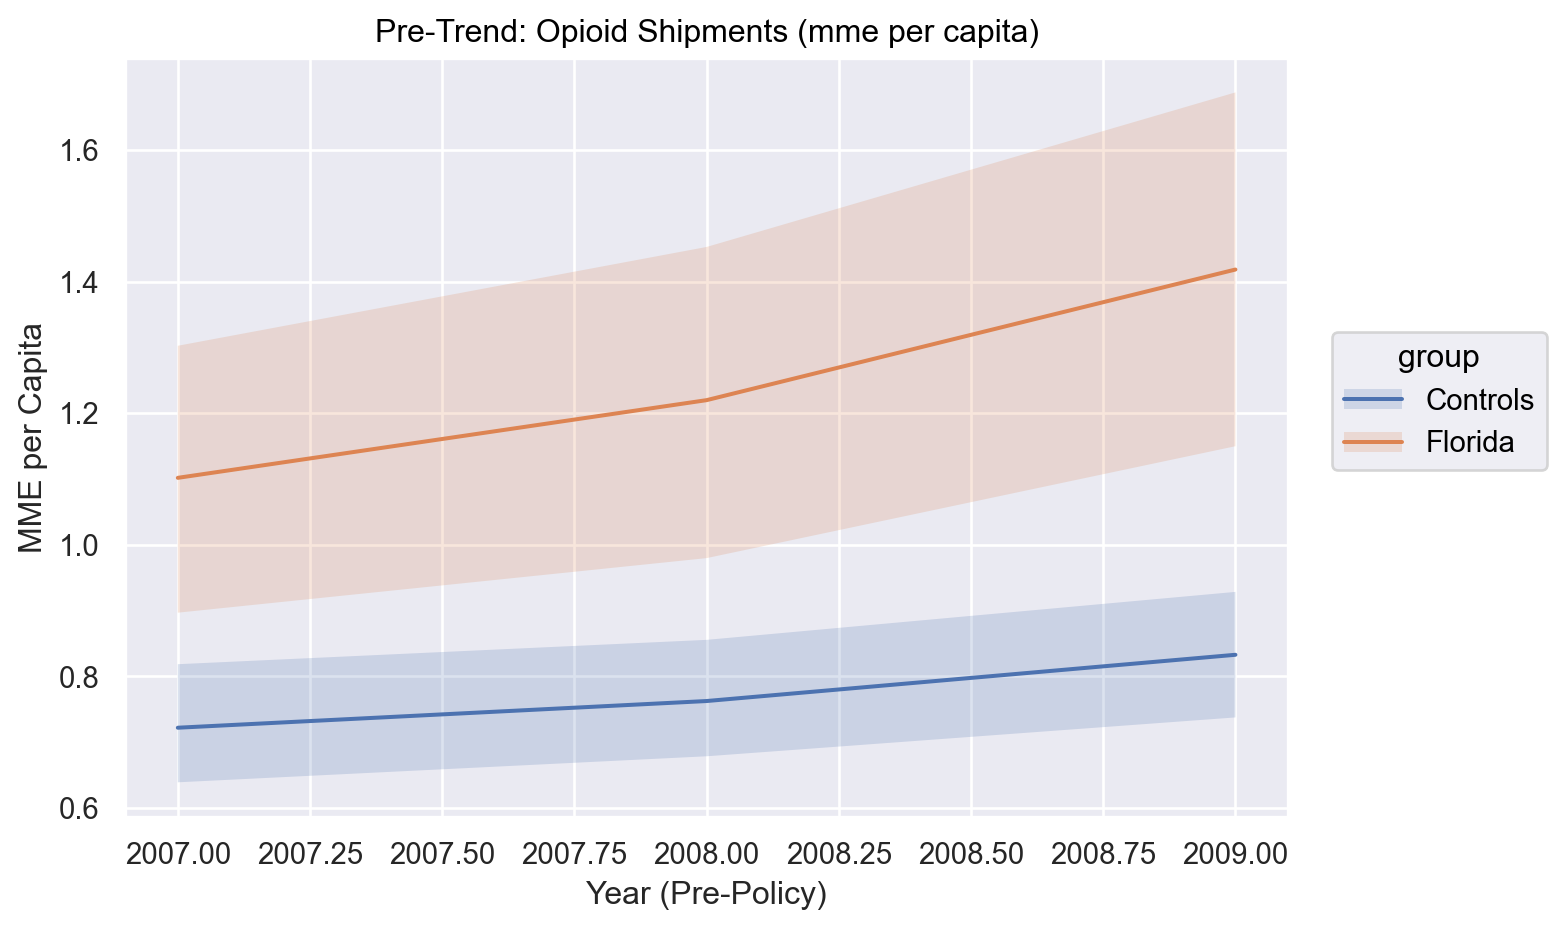

In [265]:
plot_ship = pretrend_plot_so(
    data=pre_df,
    outcome="mme_per_capita",
    title="Pre-Trend: Opioid Shipments (mme per capita)",
    ylabel="MME per Capita",
)

display(plot_ship)

3. Mortality Pre-Trend

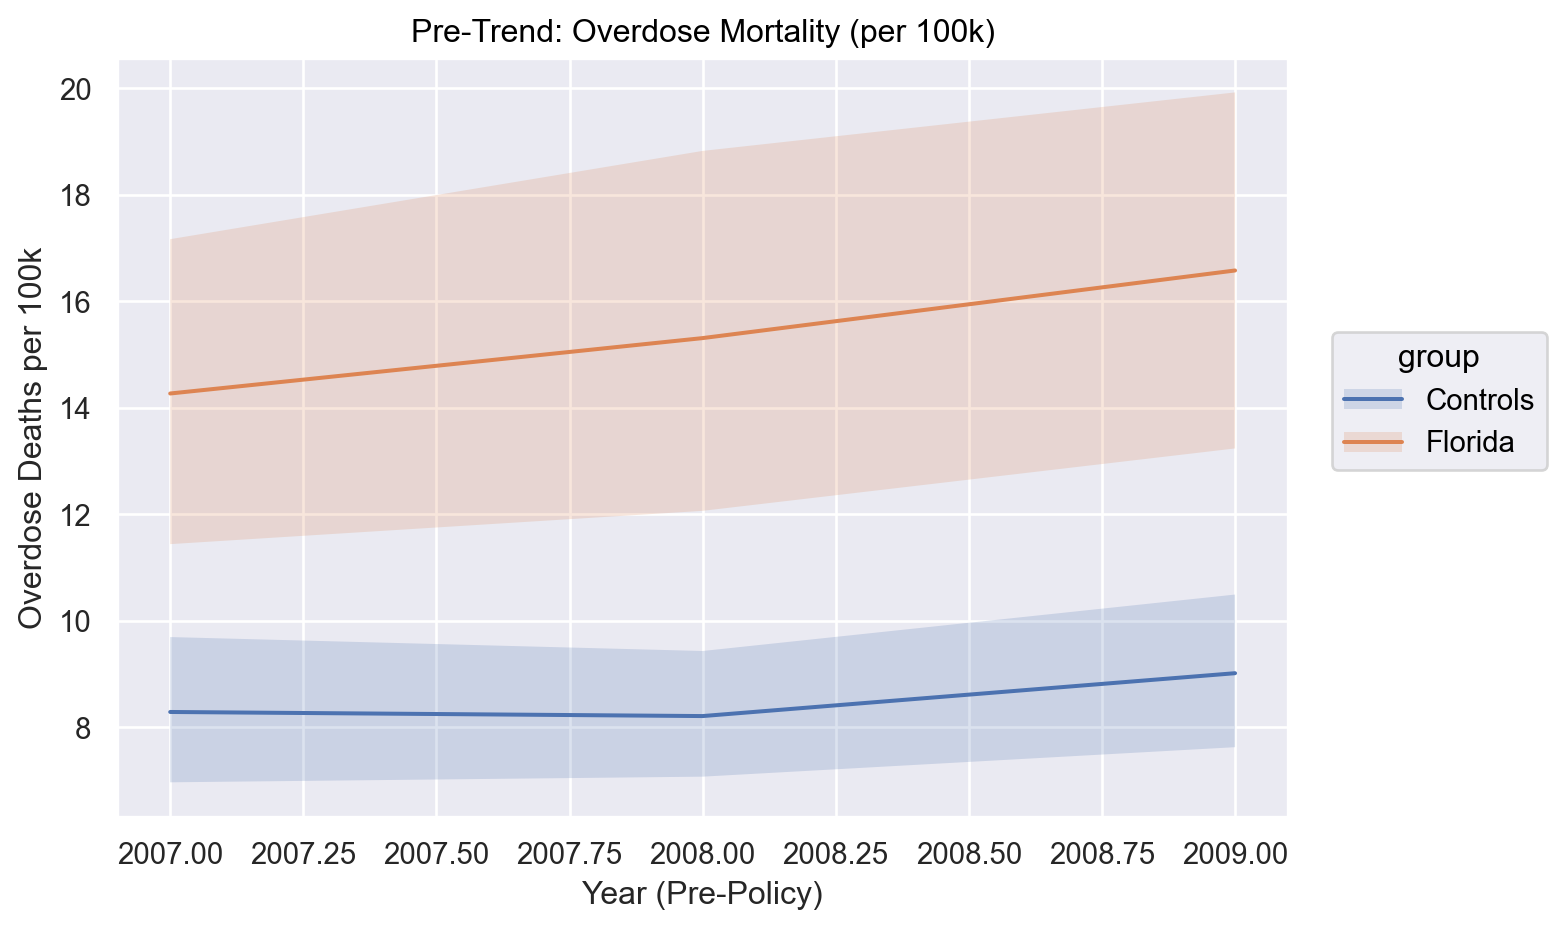

In [266]:
plot_mort = pretrend_plot_so(
    data=pre_df,
    outcome="overdose_rate_per_100k",
    title="Pre-Trend: Overdose Mortality (per 100k)",
    ylabel="Overdose Deaths per 100k",
)
display(plot_mort)

#### Step 4 Pre-Post

1. Florida - only 

In [267]:
fl_df = df[df["treat"] == 1].copy()

2. Pre-Post Function

In [268]:
def prepost_plot_so(data, outcome, title, ylabel):

    p = (
        so.Plot(
            data=data,
            x="years_from_policy",
            y=outcome,
        )
        .add(so.Line(), so.Est())  # mean line
        .add(so.Band(), so.Est())  # CI band
        .label(title=title, x="Years from Policy Change", y=ylabel)
        .layout(size=(7, 5))
    )

    # so plot
    p.show()

    # add a vertical line at 0
    plt.axvline(0, color="black", linestyle="--", linewidth=1)

    plt.close()

3. Shipment Pre-Post

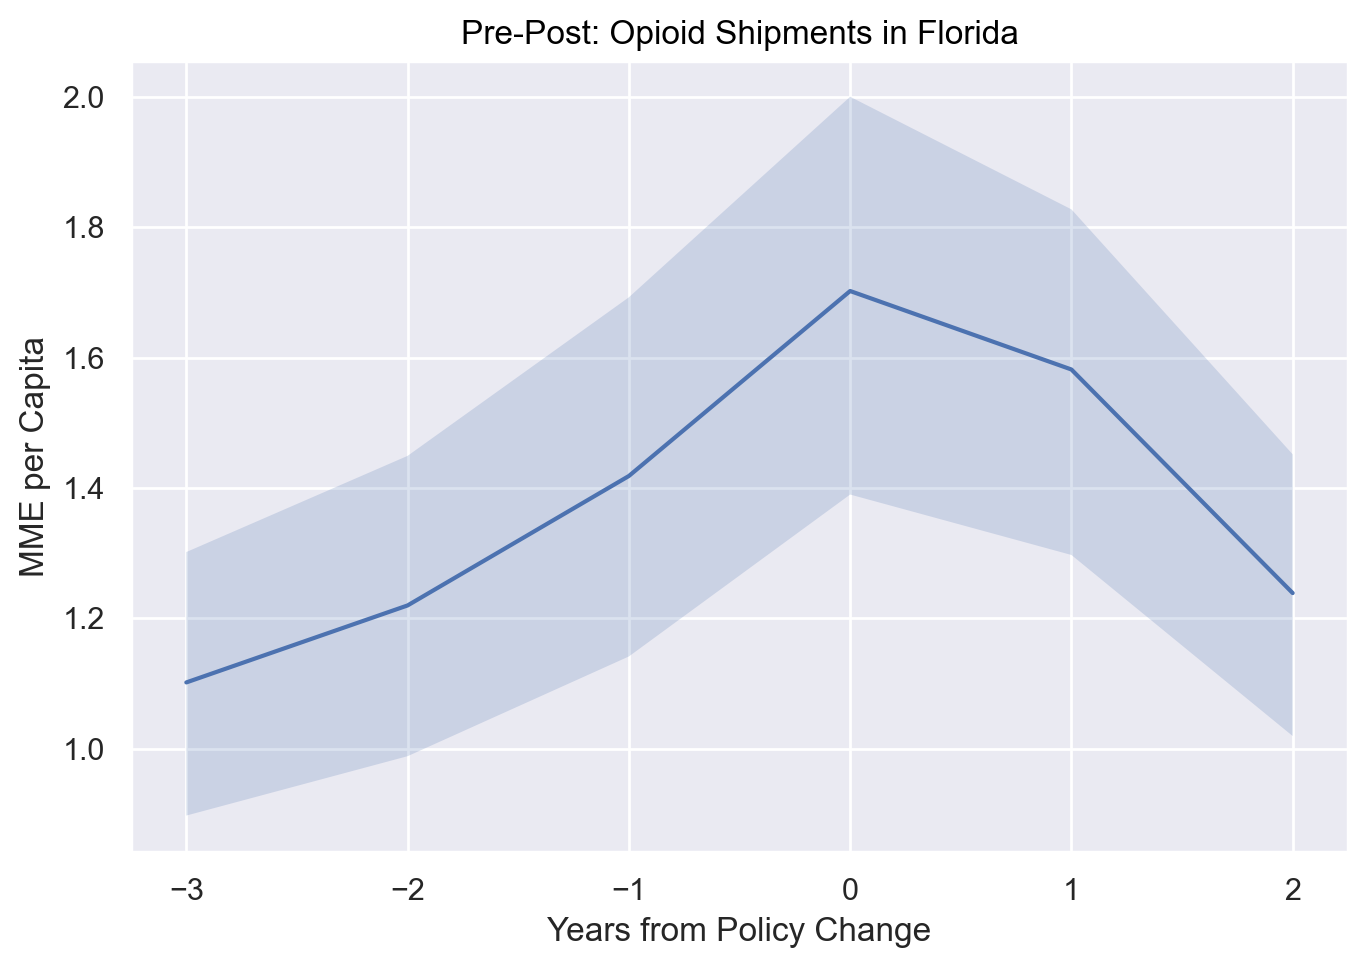

In [269]:
plot_pp_ship = prepost_plot_so(
    data=fl_df,
    outcome="mme_per_capita",
    title="Pre-Post: Opioid Shipments in Florida",
    ylabel="MME per Capita",
)

4. Mortality Pre-Post

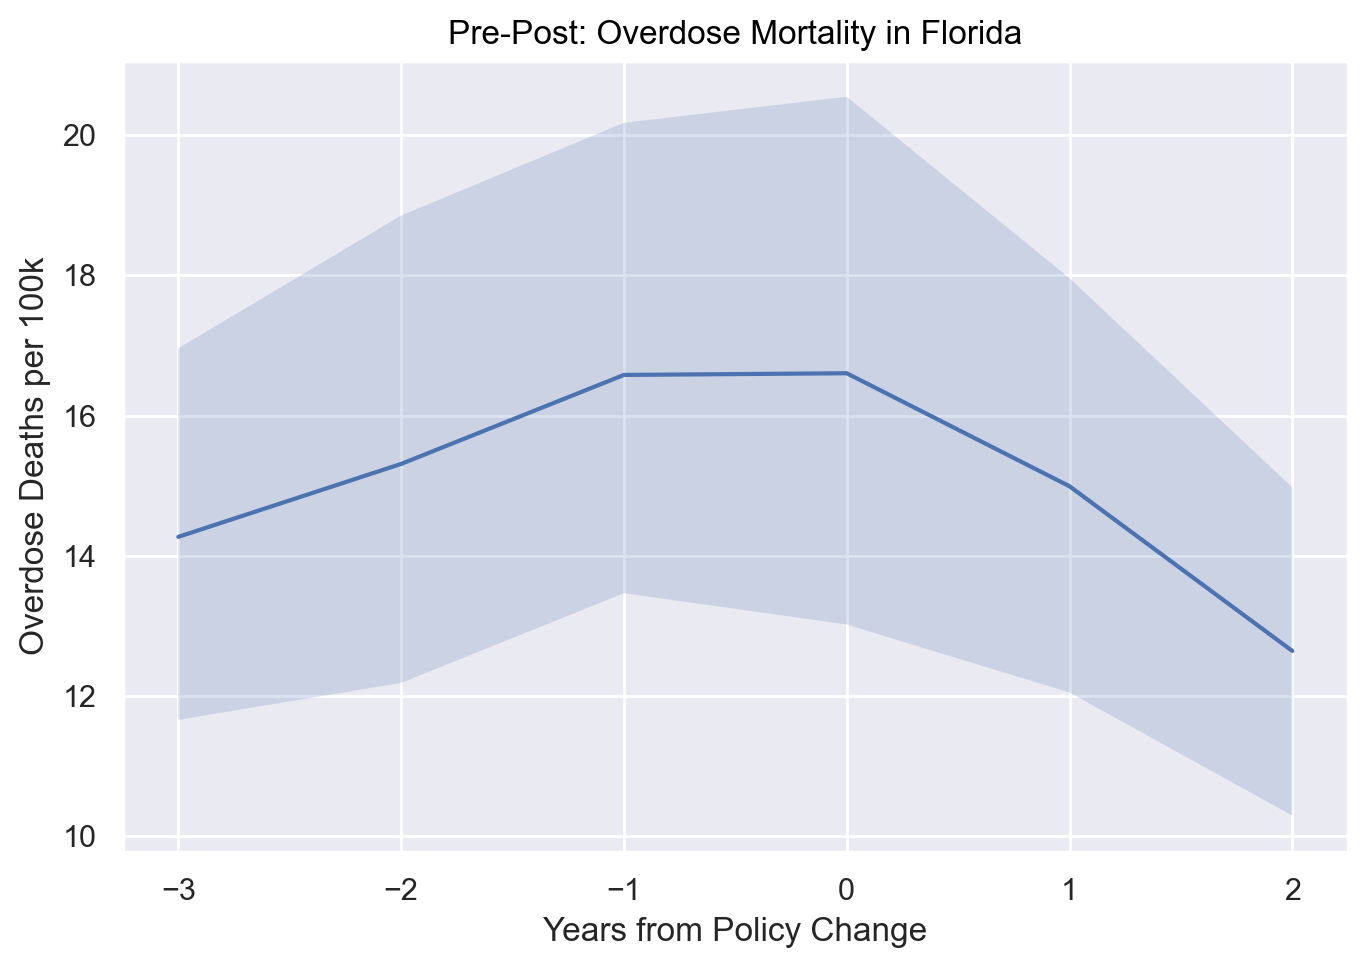

In [270]:
plot_pp_mort = prepost_plot_so(
    data=fl_df,
    outcome="overdose_rate_per_100k",
    title="Pre-Post: Overdose Mortality in Florida",
    ylabel="Overdose Deaths per 100k",
)

#### Step 5
Difference-in-Differences

1. Create Group Name

In [271]:
did_df = df.copy()
did_df["group"] = did_df["treat"].map({1: "Florida", 0: "Controls"})

2. DID plot

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.objects as so


def compute_mean_ci(df, outcome):

    summary = (
        df.groupby("years_from_policy")[outcome]
        .agg(["mean", "count", "std"])
        .reset_index()
    )

    summary["se"] = summary["std"] / summary["count"] ** 0.5
    summary["ci_low"] = summary["mean"] - 1.96 * summary["se"]
    summary["ci_high"] = summary["mean"] + 1.96 * summary["se"]

    return summary

In [273]:
import matplotlib.pyplot as plt
import numpy as np

def did_plot_great(df, outcome, title, ylabel):

    # Split groups
    df_f = df[df["group"]=="Florida"]
    df_c = df[df["group"]=="Controls"]

    # Compute stats
    f = compute_mean_ci(df_f, outcome)
    c = compute_mean_ci(df_c, outcome)

    # -----------------------------
    #   HIGH DPI + RETINA CLEAN
    # -----------------------------
    %config InlineBackend.figure_format = 'retina'
    SIZE = 18

    plt.rcParams["figure.autolayout"] = False
    plt.rcParams["figure.figsize"] = (10, 6)
    %matplotlib inline
    plt.rcParams["figure.dpi"] = 120     # interaction
    plt.rcParams["savefig.dpi"] = 300    # export
    plt.rcParams["font.sans-serif"] = ["Arial", "DejaVu Sans"]
    plt.rcParams["font.family"] = "sans-serif"
    plt.rcParams["font.size"] = SIZE
    plt.rcParams["axes.titlesize"] = SIZE
    plt.rcParams["axes.labelsize"] = SIZE
    plt.rcParams["xtick.labelsize"] = SIZE - 2
    plt.rcParams["ytick.labelsize"] = SIZE - 2

    fig, ax = plt.subplots(figsize=(10,6))

    # -----------------------------
    #      PLOT CI + MEAN
    # -----------------------------
    # Controls
    ax.fill_between(
        c["years_from_policy"], c["ci_low"], c["ci_high"],
        color="#2B2F42", alpha=0.15
    )
    ax.plot(
        c["years_from_policy"], c["mean"],
        color="#2B2F42", linewidth=3
    )

    # Florida
    ax.fill_between(
        f["years_from_policy"], f["ci_low"], f["ci_high"],
        color="#EF233C", alpha=0.15
    )
    ax.plot(
        f["years_from_policy"], f["mean"],
        color="#EF233C", linewidth=3
    )

    # -----------------------------
    #        INLINE LABELS
    # -----------------------------
    ax.text(
        f["years_from_policy"].iloc[-1] + 0.05,
        f["mean"].iloc[-1],
        "Florida",
        color="#EF233C", fontsize=SIZE, fontweight="bold"
    )
    ax.text(
        c["years_from_policy"].iloc[-1] + 0.05,
        c["mean"].iloc[-1],
        "Controls",
        color="#2B2F42", fontsize=SIZE, fontweight="bold"
    )

    # -----------------------------
    #       POLICY VERTICAL LINE
    # -----------------------------
    ax.axvline(0, color="black", linestyle="--", linewidth=1.5)

    # -----------------------------
    #         CLEAN STYLE
    # -----------------------------
    ax.grid(False)                        
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)  

    # Only keep short ticks
    ax.tick_params(axis="y", length=4)
    ax.tick_params(axis="x", length=4)

    # Remove the space by bounding bottom axis
    xmin = df["years_from_policy"].min()
    xmax = df["years_from_policy"].max()
    ax.spines["bottom"].set_bounds(xmin, xmax)

    # -----------------------------
    #       TITLES + LABELS
    # -----------------------------
    ax.set_title(title, pad=20)
    ax.set_xlabel("Years from Policy Change")
    ax.set_ylabel(ylabel)

    plt.tight_layout()
    return fig, ax

3. DID – Shipments（mme_per_capita）

(<Figure size 1200x720 with 1 Axes>,
 <Axes: title={'center': 'Difference-in-Differences: Opioid Shipments'}, xlabel='Years from Policy Change', ylabel='MME per Capita'>)

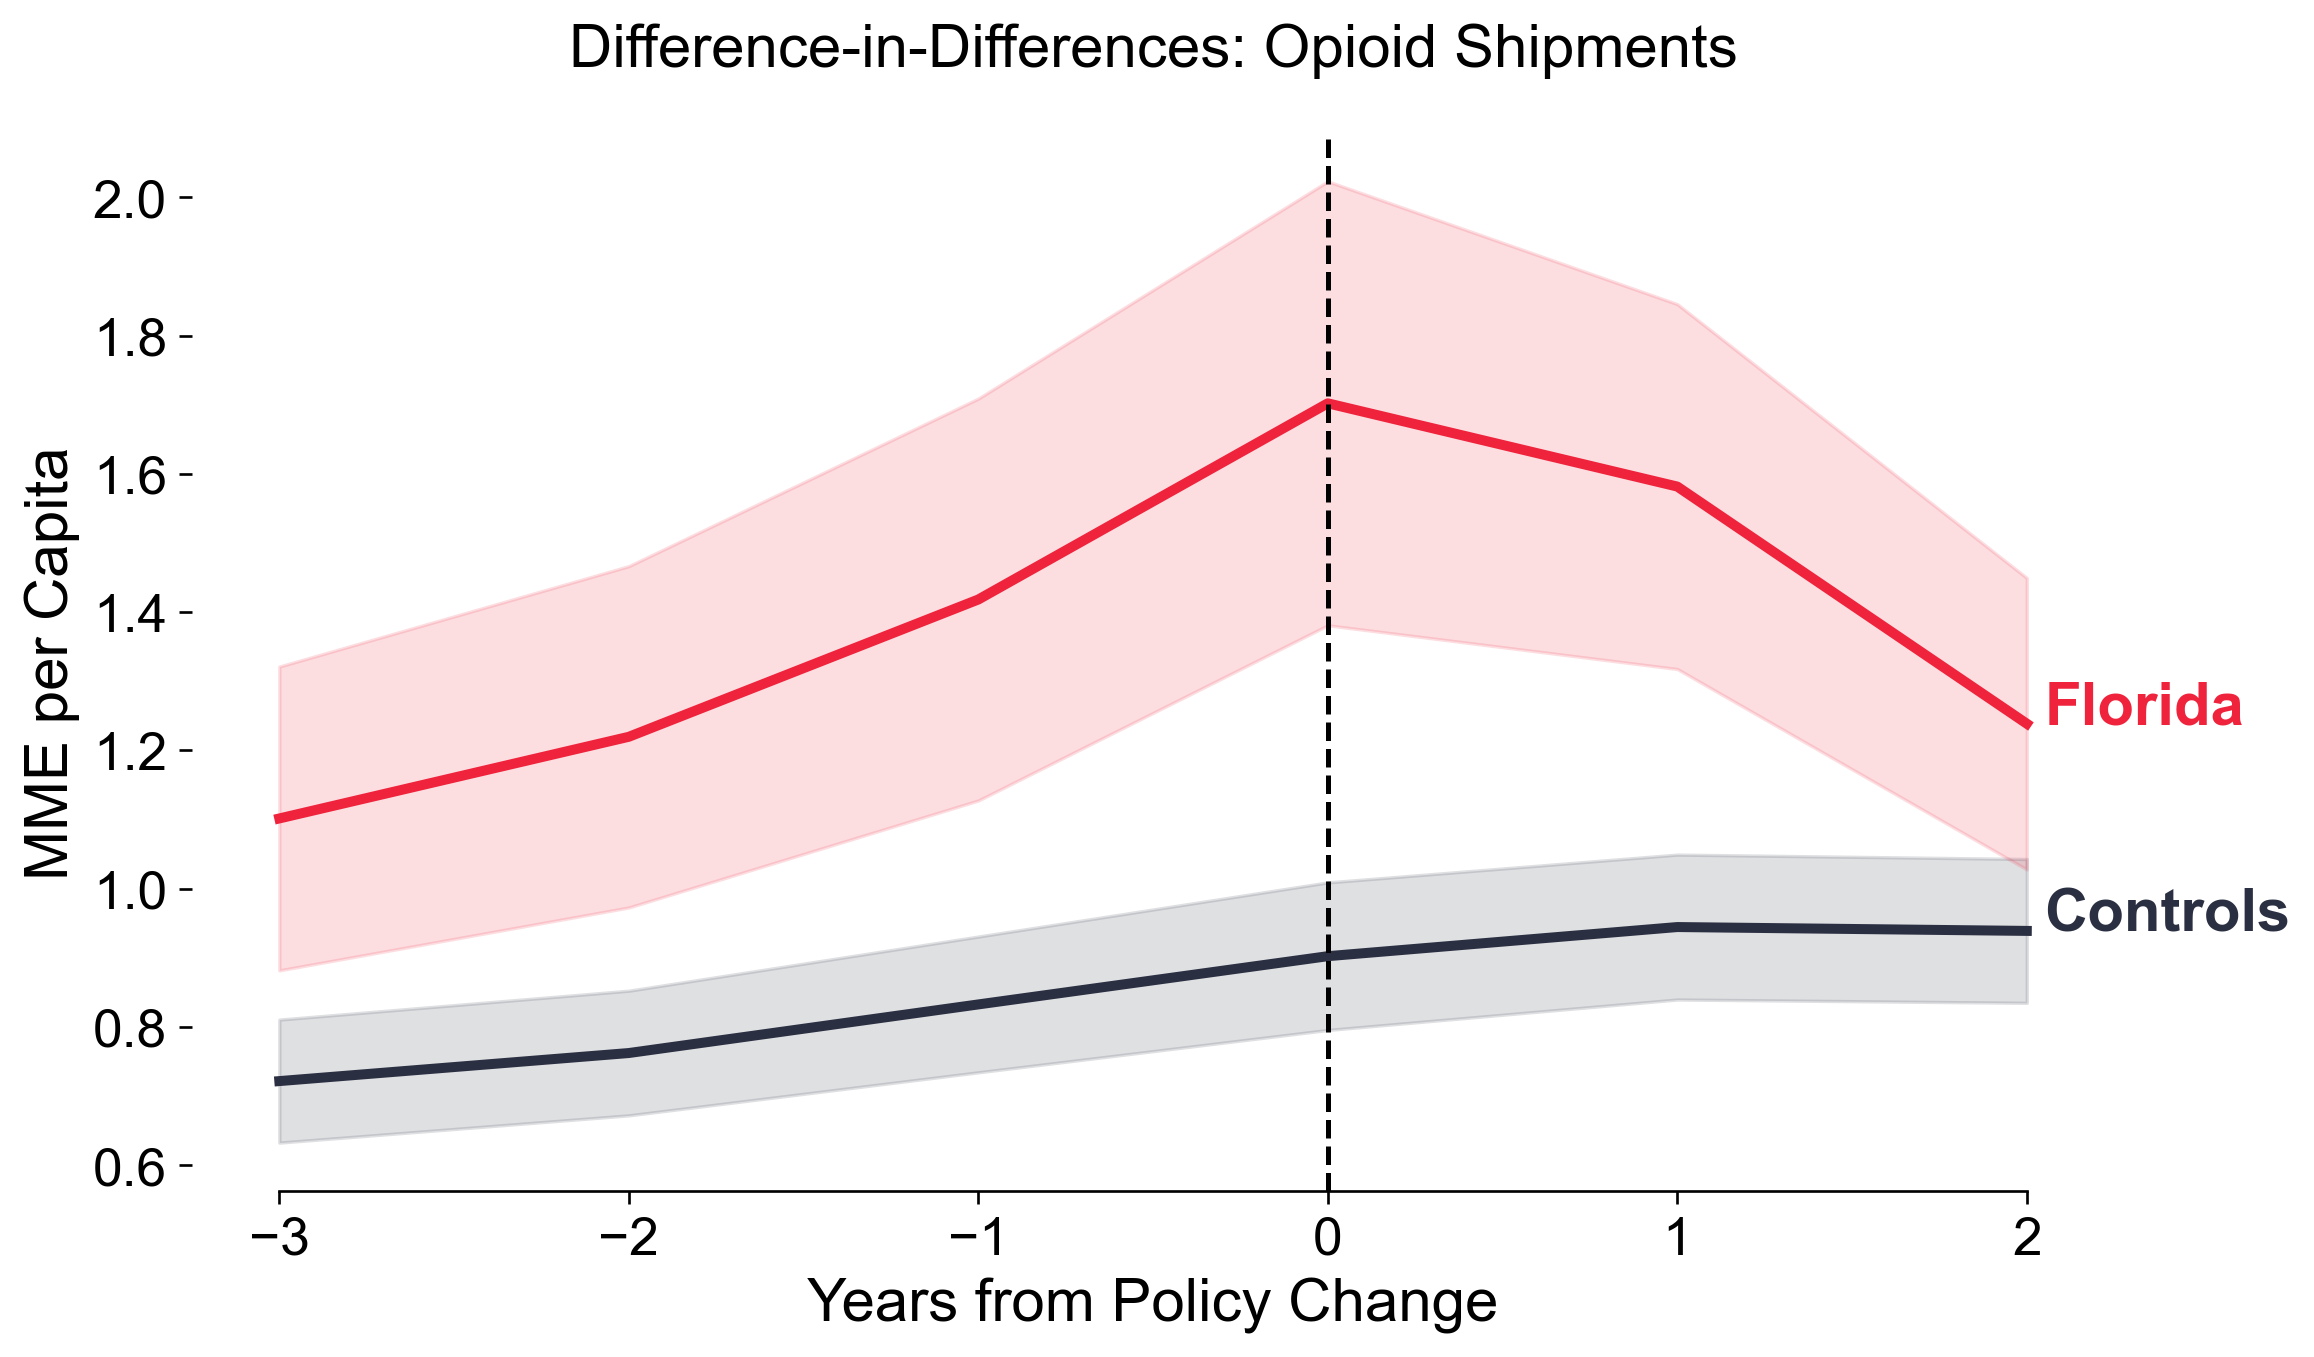

In [274]:
did_plot_great(
    df=did_df,
    outcome="mme_per_capita",
    title="Difference-in-Differences: Opioid Shipments",
    ylabel="MME per Capita",
)

4. DID - Mortality

(<Figure size 1200x720 with 1 Axes>,
 <Axes: title={'center': 'Difference-in-Differences: Overdose Mortality'}, xlabel='Years from Policy Change', ylabel='Overdose Deaths per 100k'>)

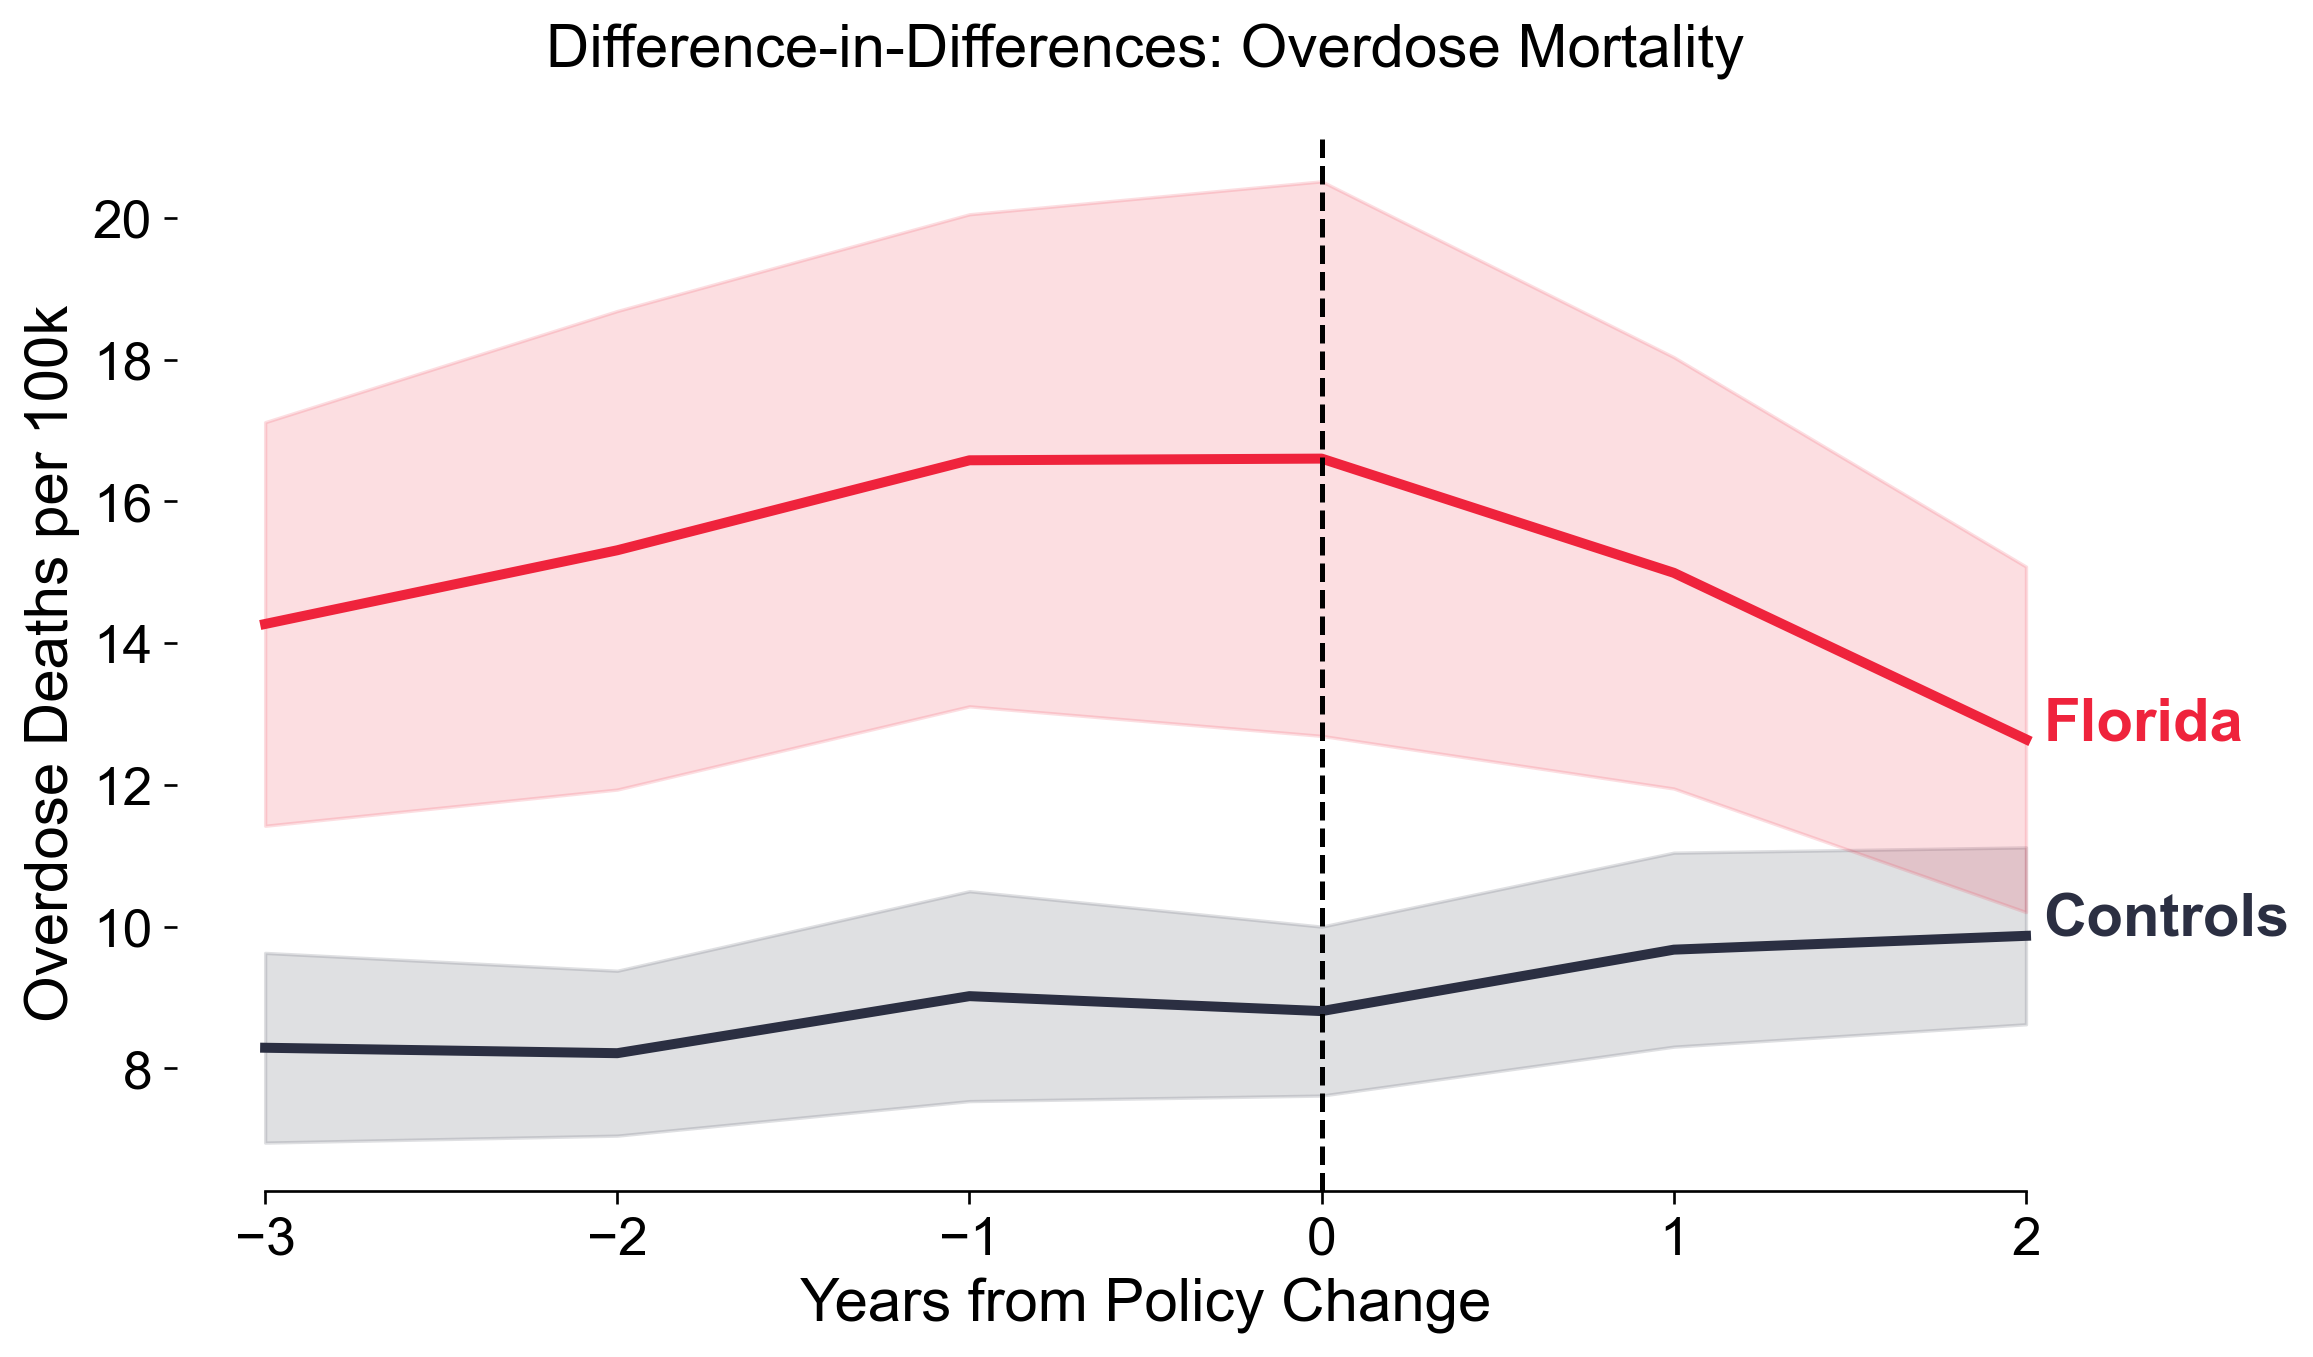

In [275]:
did_plot_great(
    df=did_df,
    outcome="overdose_rate_per_100k",
    title="Difference-in-Differences: Overdose Mortality",
    ylabel="Overdose Deaths per 100k",
)

#### Step 6 DID Regression（appendix）

1. Preparation

In [276]:
did_df = did_df.copy()

did_df["county_code"] = did_df["County Code"]

import statsmodels.formula.api as smf

In [277]:
did_df = did_df.copy()

# --- Clean controls based on actual columns in df ---

# Age proxy: 18–64 years
did_df["pct_age_25_54"] = (
    did_df["25_to_29_years"]
    + did_df["30_to_34_years"]
    + did_df["35_to_44_years"]
    + did_df["45_to_54_years"]
) / did_df["population"]

# Race structure
did_df["pct_white"] = did_df["White"] / did_df["population"]
did_df["pct_black"] = did_df["Black_or_African_American"] / did_df["population"]

# Education: college-and-above
did_df["pct_college"] = did_df["4_or_more_years_of_college"] / did_df["population"]

# Poverty rate
did_df["poverty_rate"] = did_df["less_than_10,000"] / did_df["population"]

# check control variables
did_df[
    ["pct_age_25_54", "pct_white", "pct_black", "pct_college", "poverty_rate"]
].describe()

,pct_age_25_54,pct_white,pct_black,pct_college,poverty_rate
count,306.000000,306.000000,306.000000,306.000000,306.000000
mean,0.414235,0.702276,0.098529,0.206257,0.021246
std,0.034414,0.122654,0.081675,0.067118,0.007004
min,0.312312,0.428552,0.008535,0.073050,0.008834
25%,0.393560,0.618044,0.031231,0.165224,0.016078
50%,0.417443,0.721066,0.081960,0.202597,0.019881
75%,0.432299,0.803194,0.140287,0.244346,0.026355
max,0.517574,0.917224,0.407090,0.407207,0.042603


In [278]:
did_ship = did_df.dropna(subset=["mme_per_capita"]).copy()
did_mort = did_df.dropna(subset=["overdose_rate_per_100k"]).copy()

2. Shipment DID (no controls)

In [279]:
model_ship = smf.ols(
    formula="""
        mme_per_capita ~ treat*post
        + C(year) + C(county_code)
    """,
    data=did_ship,
).fit(cov_type="cluster", cov_kwds={"groups": did_ship["county_code"]})

print(model_ship.summary())

                            OLS Regression Results                            
Dep. Variable:         mme_per_capita   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1419.
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           6.57e-55
Time:                        16:55:45   Log-Likelihood:                 216.86
No. Observations:                 306   AIC:                            -317.7
Df Residuals:                     248   BIC:                            -101.8
Df Model:                          57                                         
Covariance Type:              cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

/Users/chenqiyu/miniforge3/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 59, but rank is 6
  warnings.warn('covariance of constraints does not have full '


3. Mortality DID (no control)

In [280]:
model_mort = smf.ols(
    formula="""
        overdose_rate_per_100k ~ treat*post
        + C(year) + C(county_code)
    """,
    data=did_mort,
).fit(cov_type="cluster", cov_kwds={"groups": did_mort["county_code"]})

print(model_mort.summary())

                              OLS Regression Results                              
Dep. Variable:     overdose_rate_per_100k   R-squared:                       0.890
Model:                                OLS   Adj. R-squared:                  0.863
Method:                     Least Squares   F-statistic:                     10.91
Date:                    Thu, 27 Nov 2025   Prob (F-statistic):           8.80e-08
Time:                            16:55:45   Log-Likelihood:                -596.40
No. Observations:                     298   AIC:                             1309.
Df Residuals:                         240   BIC:                             1523.
Df Model:                              57                                         
Covariance Type:                  cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

/Users/chenqiyu/miniforge3/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 59, but rank is 6
  warnings.warn('covariance of constraints does not have full '


4. Shipment DID (With Controls)

In [281]:
model_ship_ctrl = smf.ols(
    formula="""
        mme_per_capita ~ treat*post
        + C(year) + C(county_code)
        + population
        + pct_age_25_54
        + pct_white
        + pct_black
        + pct_college
        + poverty_rate
    """,
    data=did_ship,
).fit(cov_type="cluster", cov_kwds={"groups": did_ship["county_code"]})

print(model_ship_ctrl.summary())

                            OLS Regression Results                            
Dep. Variable:         mme_per_capita   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     193.7
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           4.07e-38
Time:                        16:55:45   Log-Likelihood:                 230.26
No. Observations:                 306   AIC:                            -332.5
Df Residuals:                     242   BIC:                            -94.21
Df Model:                          63                                         
Covariance Type:              cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

/Users/chenqiyu/miniforge3/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 65, but rank is 12
  warnings.warn('covariance of constraints does not have full '


5. Mortality DID (With Controls)

In [282]:
model_mort_ctrl = smf.ols(
    formula="""
        overdose_rate_per_100k ~ treat*post
        + C(year) + C(county_code)
        + population
        + pct_age_25_54
        + pct_white
        + pct_black
        + pct_college
        + poverty_rate
    """,
    data=did_mort,
).fit(cov_type="cluster", cov_kwds={"groups": did_mort["county_code"]})

print(model_mort_ctrl.summary())

                              OLS Regression Results                              
Dep. Variable:     overdose_rate_per_100k   R-squared:                       0.896
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     20.16
Date:                    Thu, 27 Nov 2025   Prob (F-statistic):           2.72e-15
Time:                            16:55:45   Log-Likelihood:                -586.82
No. Observations:                     298   AIC:                             1302.
Df Residuals:                         234   BIC:                             1538.
Df Model:                              63                                         
Covariance Type:                  cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

/Users/chenqiyu/miniforge3/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 65, but rank is 12
  warnings.warn('covariance of constraints does not have full '


6. Compare

In [283]:
did_compare = pd.DataFrame(
    {
        "Outcome": ["MME per Capita", "Overdose Deaths per 100k"],
        "DID_no_controls": [
            model_ship.params["treat:post"],
            model_mort.params["treat:post"],
        ],
        "SE_no_controls": [model_ship.bse["treat:post"], model_mort.bse["treat:post"]],
        "p_no_controls": [
            model_ship.pvalues["treat:post"],
            model_mort.pvalues["treat:post"],
        ],
        "DID_with_controls": [
            model_ship_ctrl.params["treat:post"],
            model_mort_ctrl.params["treat:post"],
        ],
        "SE_with_controls": [
            model_ship_ctrl.bse["treat:post"],
            model_mort_ctrl.bse["treat:post"],
        ],
        "p_with_controls": [
            model_ship_ctrl.pvalues["treat:post"],
            model_mort_ctrl.pvalues["treat:post"],
        ],
    }
)

did_compare

,Outcome,DID_no_controls,SE_no_controls,p_no_controls,DID_with_controls,SE_with_controls,p_with_controls
0,MME per Capita,0.135414,0.059256,0.022300,0.140326,0.042518,0.000965
1,Overdose Deaths per 100k,-1.749646,0.690553,0.011287,-2.217752,0.793634,0.005199


7. DID Table (With and Without Controls)

In [284]:
import pandas as pd
import numpy as np


def fmt(coef, se):
    return f"{coef:.3f}\n({se:.3f})"


# -----------------------------
# 1. combine Shipments Panel
# -----------------------------
ship_noctrl = fmt(model_ship.params["treat:post"], model_ship.bse["treat:post"])

ship_ctrl = fmt(model_ship_ctrl.params["treat:post"], model_ship_ctrl.bse["treat:post"])

# -----------------------------
# 2. combine Mortality Panel
# -----------------------------
mort_noctrl = fmt(model_mort.params["treat:post"], model_mort.bse["treat:post"])

mort_ctrl = fmt(model_mort_ctrl.params["treat:post"], model_mort_ctrl.bse["treat:post"])

# -----------------------------
# 3. paper table
# -----------------------------
reg_table = pd.DataFrame(
    {
        " ": [
            "DID Estimate (treat × post)",
            "",
            "County FE",
            "Year FE",
            "Observations",
        ],
        "Shipments\nNo Controls": [ship_noctrl, "", "Yes", "Yes", model_ship.nobs],
        "Shipments\nWith Controls": [ship_ctrl, "", "Yes", "Yes", model_ship_ctrl.nobs],
        "Mortality\nNo Controls": [mort_noctrl, "", "Yes", "Yes", model_mort.nobs],
        "Mortality\nWith Controls": [mort_ctrl, "", "Yes", "Yes", model_mort_ctrl.nobs],
    }
)

reg_table

,,Shipments\nNo Controls,Shipments\nWith Controls,Mortality\nNo Controls,Mortality\nWith Controls
0,DID Estimate (treat × post),0.135\n(0.059),0.140\n(0.043),-1.750\n(0.691),-2.218\n(0.794)
1,,,,,
2,County FE,Yes,Yes,Yes,Yes
3,Year FE,Yes,Yes,Yes,Yes
4,Observations,306.0,306.0,298.0,298.0
